# Cardiovascular Disease Prediction

## Context
Cardiovascular diseases (CVDs) represent a significant global health challenge, being the leading cause of death worldwide. Annually, an estimated 17.9 million lives are claimed by CVDs, constituting 31% of all global deaths. Heart attacks and strokes are responsible for four out of five CVD deaths, with one-third occurring prematurely in individuals under 70 years of age. Heart failure, a common consequence of CVDs, is a focal point in this dataset. The dataset encompasses 11 features that can potentially be employed to predict the likelihood of heart disease.

Early detection and management are pivotal for individuals with cardiovascular disease or those at high cardiovascular risk due to risk factors like hypertension, diabetes, and hyperlipidemia. Machine learning models offer a promising avenue for aiding in this early detection and management process.

## Attribute Information

1. **Age:** Age of the patient [years]
2. **Sex:** Sex of the patient [M: Male, F: Female]
3. **ChestPainType:** Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. **RestingBP:** Resting blood pressure [mm Hg]
5. **Cholesterol:** Serum cholesterol [mm/dl]
6. **FastingBS:** Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. **RestingECG:** Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. **MaxHR:** Maximum heart rate achieved [Numeric value between 60 and 202]
9. **ExerciseAngina:** Exercise-induced angina [Y: Yes, N: No]
10. **Oldpeak:** Oldpeak = ST [Numeric value measured in depression]
11. **ST_Slope:** The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. **HeartDisease:** Output class [1: heart disease, 0: Normal]

### The type of each column

1. **Age:** Numeric (Continuous, Ratio)
2. **Sex:** Categorical (Nominal)
3. **ChestPainType:**  Categorical (Nominal)
4. **RestingBP:** Numeric (Continuous, Ratio)
5. **Cholesterol:** Numeric (Continuous, Ratio)
6. **FastingBS:** Categorical (Nominal)
7. **RestingECG:** Categorical (Nominal)
8. **MaxHR:** Numeric (Continuous, Ratio)
9. **ExerciseAngina:** Categorical (Nominal)
10. **Oldpeak:** Numeric (Continuous, Ratio)
11. **ST_Slope:** Categorical (Ordinal)
12. **HeartDisease:** Categorical (Binary)

 So, there are 5 numeric attributes and 7 nominal attributes in the dataset.

In [4111]:
# !pip install Jinja2

In [4112]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import seaborn as sns  # Importing seaborn for enhanced data visualization
import plotly.express as px ## for plotting
import plotly.graph_objects as go ## for plotting
from plotly.subplots import make_subplots ## for plottingimport warnings  # Importing warnings to handle warning messages
import numpy as np  # Importing numpy for numerical operations
from sklearn.feature_selection import SelectKBest, f_classif  # Importing feature selection methods
from sklearn.utils import resample  # Importing resample for data resampling
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
from sklearn.neighbors import KNeighborsClassifier  # Importing KNeighborsClassifier for K-Nearest Neighbors algorithm
from sklearn.metrics import accuracy_score  # Importing accuracy_score for model evaluation
from sklearn.model_selection import cross_val_score  # Importing cross_val_score for cross-validation
from sklearn.metrics import classification_report  # Importing classification_report for model evaluation
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning
from sklearn.pipeline import make_pipeline  # Importing make_pipeline for creating a pipeline of preprocessing and modeling steps
from sklearn.metrics import confusion_matrix  # Importing confusion_matrix for model evaluation
import numpy as np  # Importing numpy for numerical operations
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, MultinomialNB# Importing GaussianNB for Naive Bayes algorithm
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning
from sklearn.metrics import classification_report  # Importing classification_report for model evaluation
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for Random Forest algorithm
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression for logistic regression algorithm
from sklearn.pipeline import Pipeline  # Importing Pipeline for creating a pipeline of preprocessing and modeling steps
from sklearn.model_selection import learning_curve  # Importing learning_curve for plotting learning curves
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier for decision tree algorithm
from sklearn.feature_selection import VarianceThreshold  # For variance-based feature selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [4113]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# Your code here

# To reset the warning filter to its default state
warnings.resetwarnings()


In [4114]:
data=pd.read_csv('heart.csv') ## read data
originaldata=data.copy() ## make a copy of the original data



In [4115]:
data.info() ## show data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Deals with Missing Values

In [4116]:
data.isnull().sum() ## check for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4117]:
##CHECK FOR DUPLICATES
data.duplicated().sum()

0

In [4118]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

observition: no missigng values in the data

In [4119]:
data.describe() # show data description

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4120]:
print(data.shape) ## show data shape

(918, 12)


In [4121]:
# Sort the DataFrame by the 'Age' and 'Cholesterol' column
df_sorted = data.sort_values(by=['Age', 'Cholesterol'])

# Display the sorted DataFrame
print(df_sorted)


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
208   28   M           ATA        130          132          0        LVH  \
829   29   M           ATA        130          204          0        LVH   
170   29   M           ATA        120          243          0     Normal   
219   29   M           ATA        140          263          0     Normal   
215   30   F            TA        170          237          0         ST   
..   ...  ..           ...        ...          ...        ...        ...   
556   75   M           ASY        160          310          1     Normal   
541   76   M           NAP        104          113          0        LVH   
688   76   F           NAP        140          197          0         ST   
447   77   M           ASY        124          171          0         ST   
814   77   M           ASY        125          304          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
208    185              N  

## Dimensionality Reduction

In [4122]:
# X = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
# y = data['HeartDisease']
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
# plt.title("PCA")
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# plt.show()

## Visualization

###  Line plots

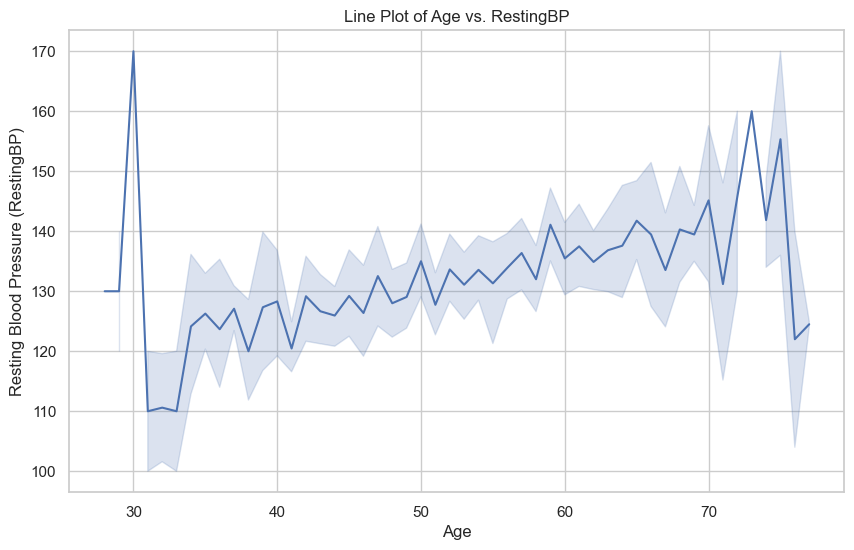

In [4123]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='RestingBP', data=data)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (RestingBP)")
plt.title("Line Plot of Age vs. RestingBP")

plt.show()


This line plot shows how resting blood pressure changes with age.

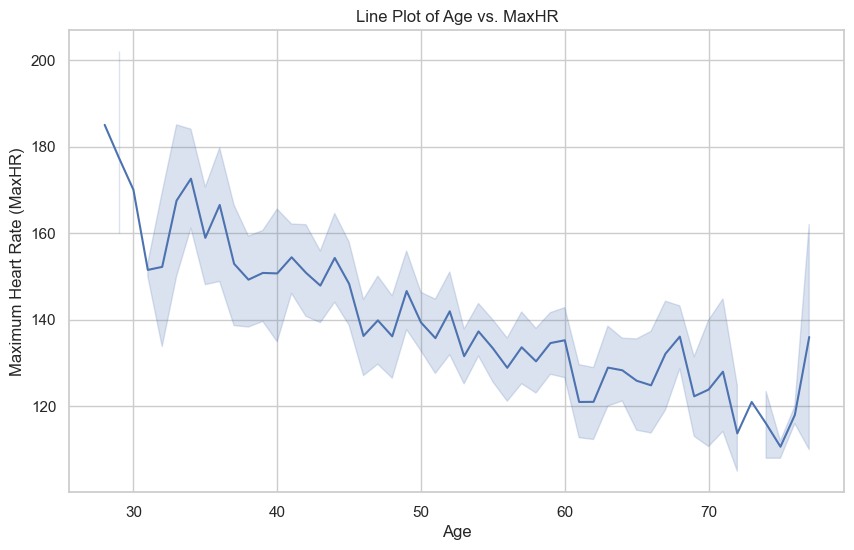

In [4124]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='MaxHR', data=data)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (MaxHR)")
plt.title("Line Plot of Age vs. MaxHR")

plt.show()


This line plot will show how the maximum heart rate (MaxHR) changes with age.

### Histograms

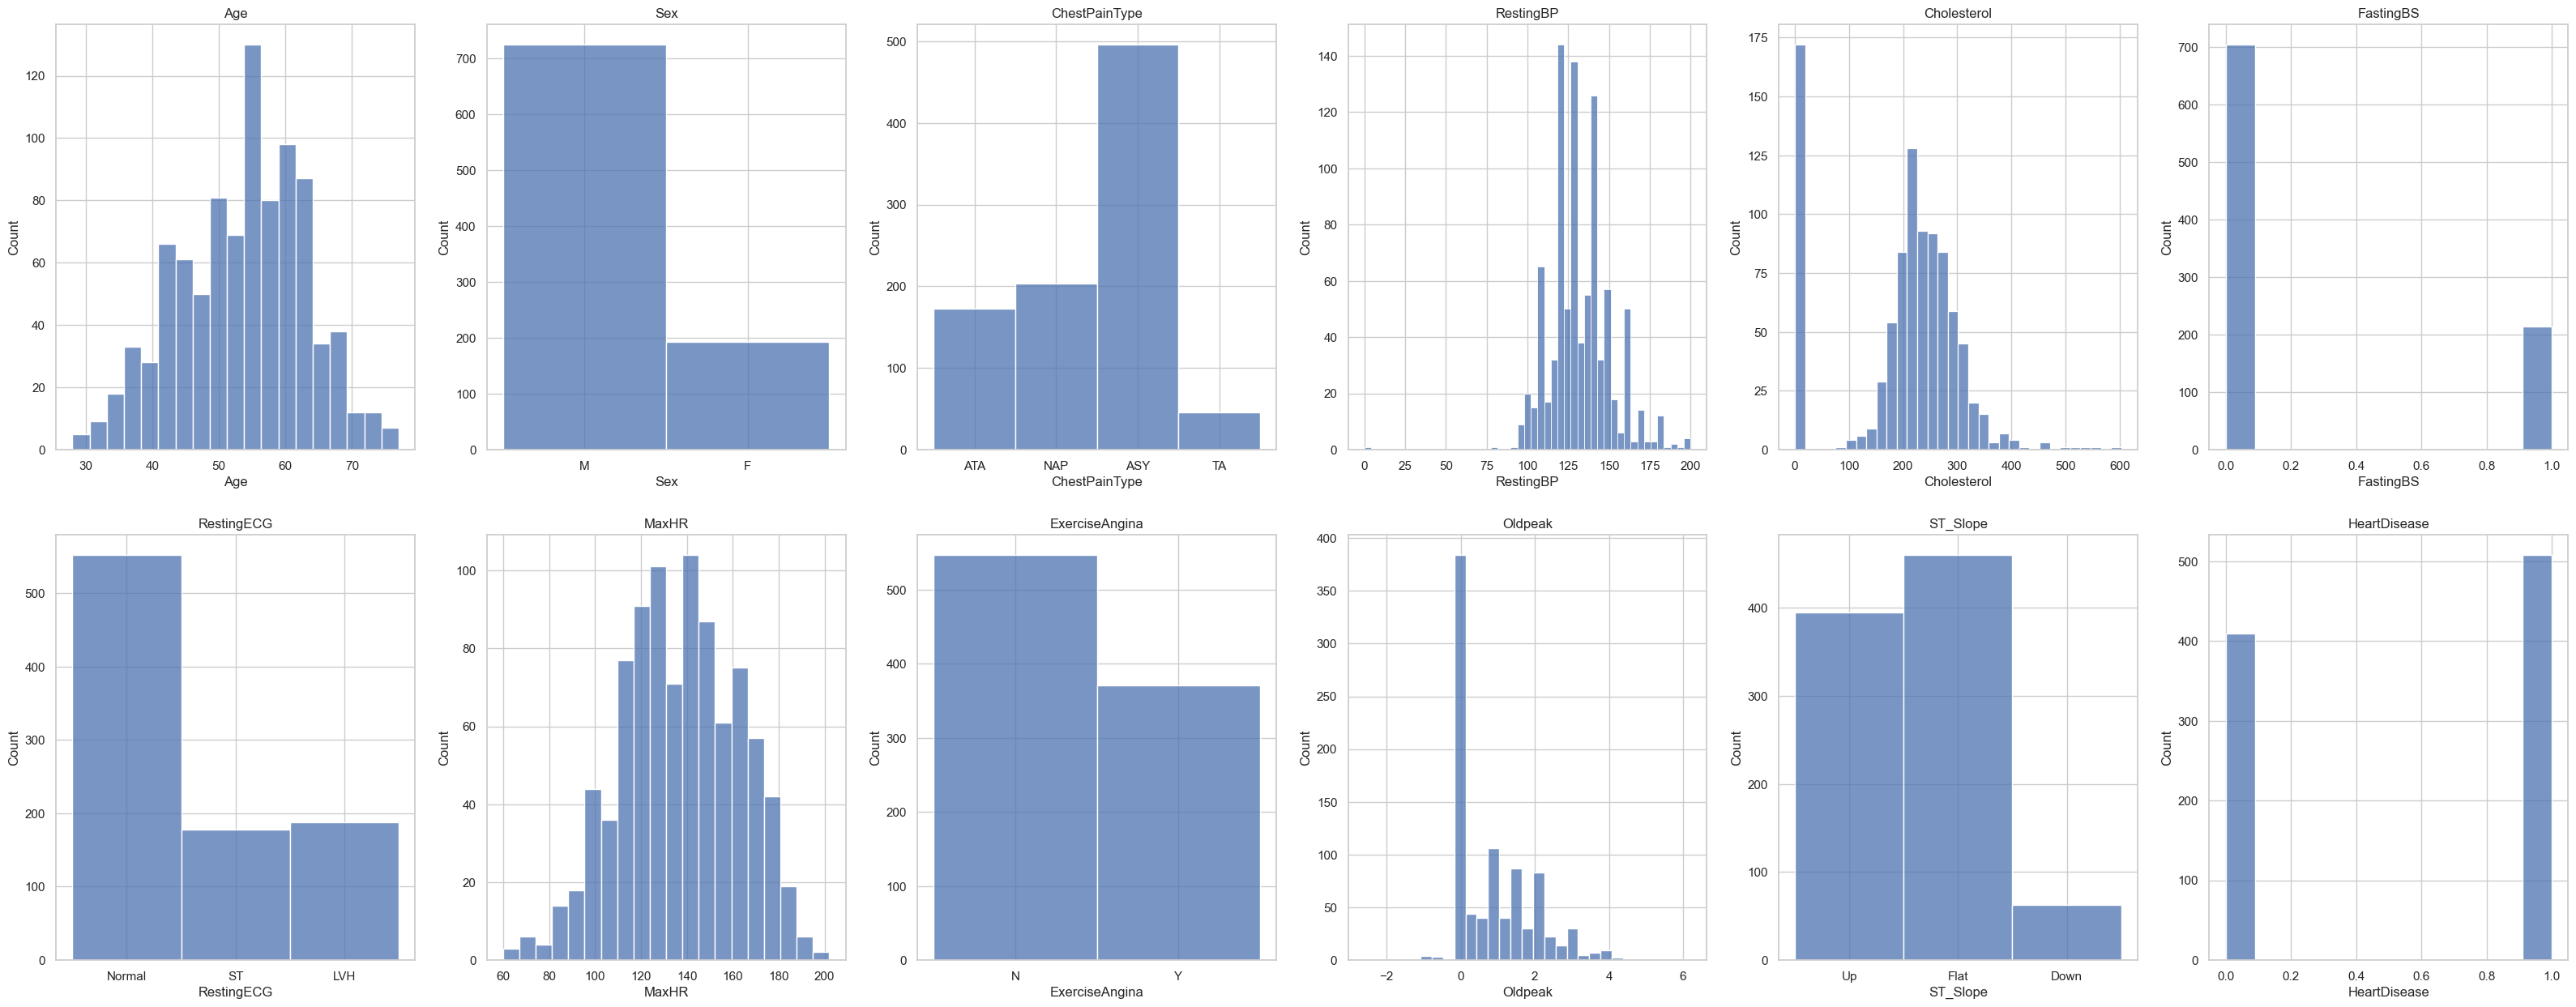

In [4125]:
eda_df = data.copy()
plt.figure(figsize=(40, 15))

# Calculate the number of rows and columns needed
num_cols = len(eda_df.columns)
num_rows = (num_cols - 1) // 6 + 1

for i, col in enumerate(eda_df.columns):
    plt.subplot(num_rows, 6, i + 1)
    sns.histplot(data=eda_df[col])
    plt.title(col)

plt.show()


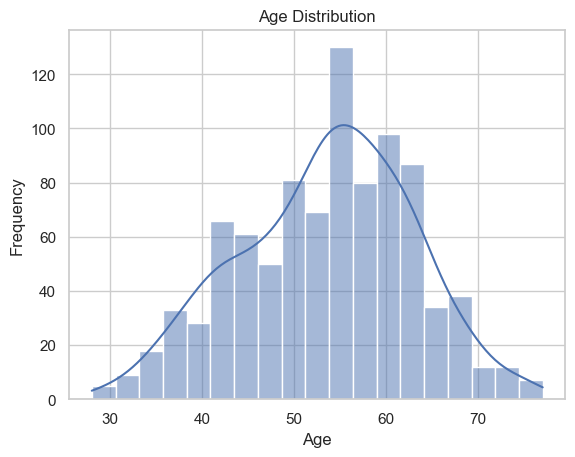

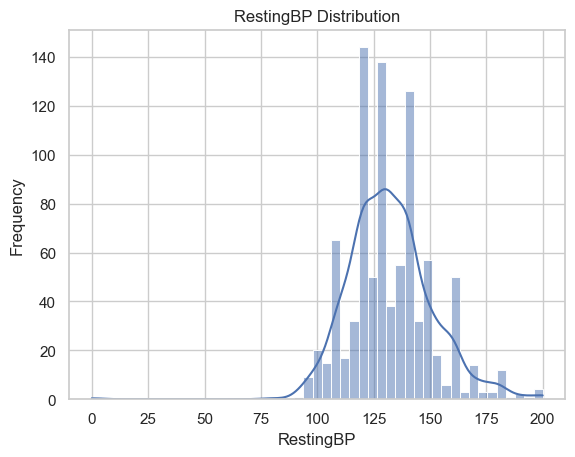

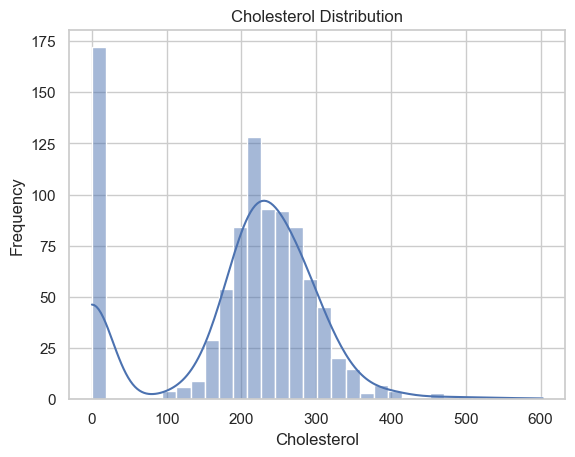

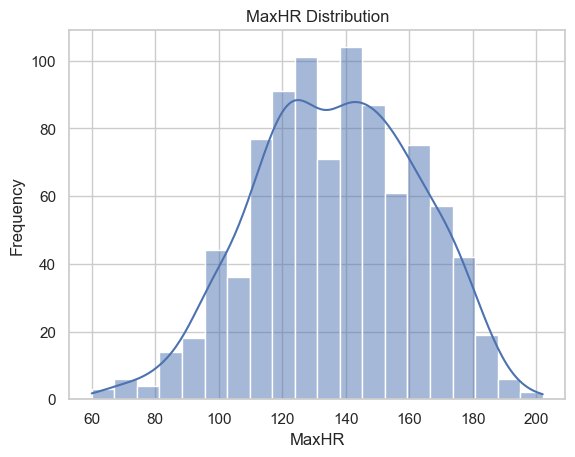

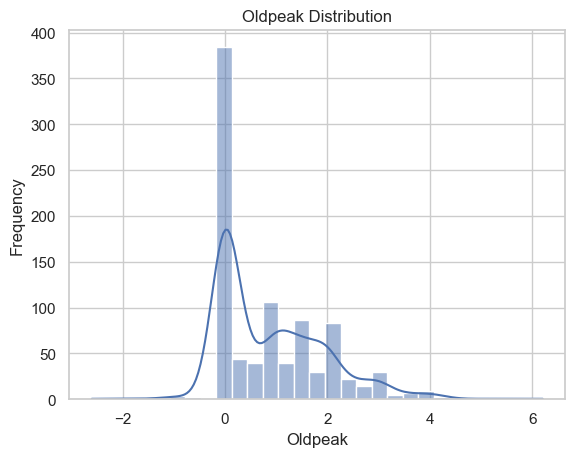

In [4126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from correlation calculation
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
numeric_data = data[numeric_features]

# Iterate over each numeric feature
for feature in numeric_data.columns:
    # Create a histogram plot using seaborn
    sns.histplot(data=numeric_data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')

    # Display the plot
    plt.show()


<h5>observation: most of our citical featuers follow the normal distribution shape which might indcate that using algorthims like guassinNB , random forest and logistic regression will lead to a higher accurecy </h5>

### Bar Charts

In [4127]:
px.histogram(data,x='Sex',color='HeartDisease',template='seaborn',barmode='group',title='Distribution of sick and the healthy')

Observations:
- Males represent the majority of the patients.
- Males have the highest number of heart diseases.
- The number of healthy women is larger than the number of unhealthy women.


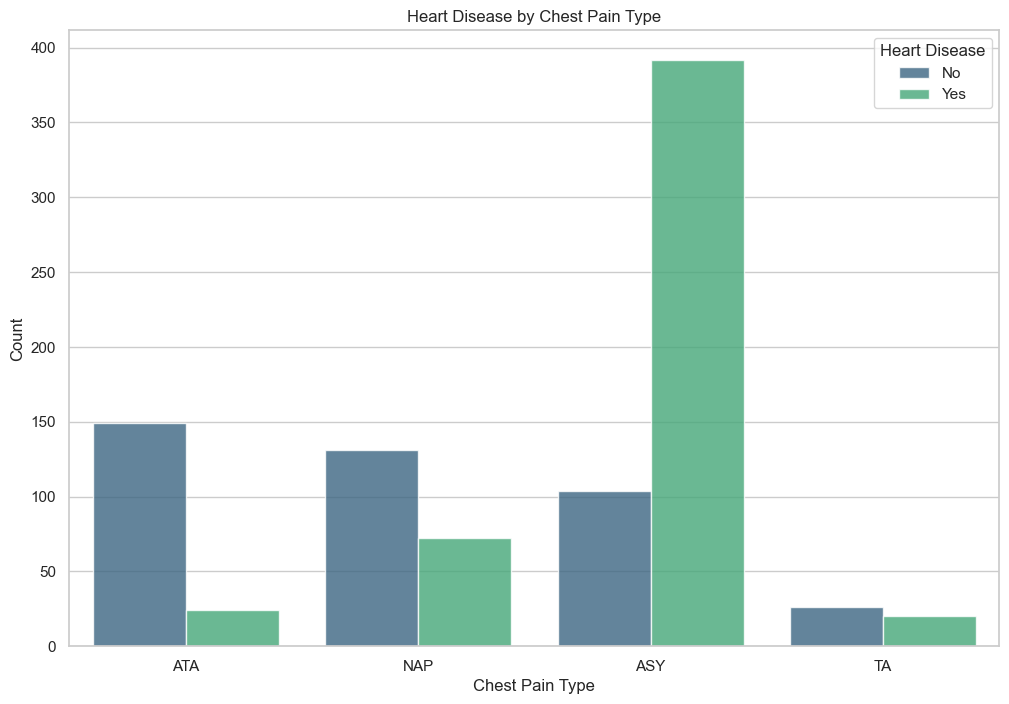

In [4128]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar chart for the count of heart disease occurrences based on ChestPainType
plt.figure(figsize=(12, 8))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=data, palette='viridis', alpha=0.8)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Heart Disease by Chest Pain Type')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.show()

<h4>observation: it is likely to have a heart failure more when the patient is diagonsed with ASY chest pain  </h4>

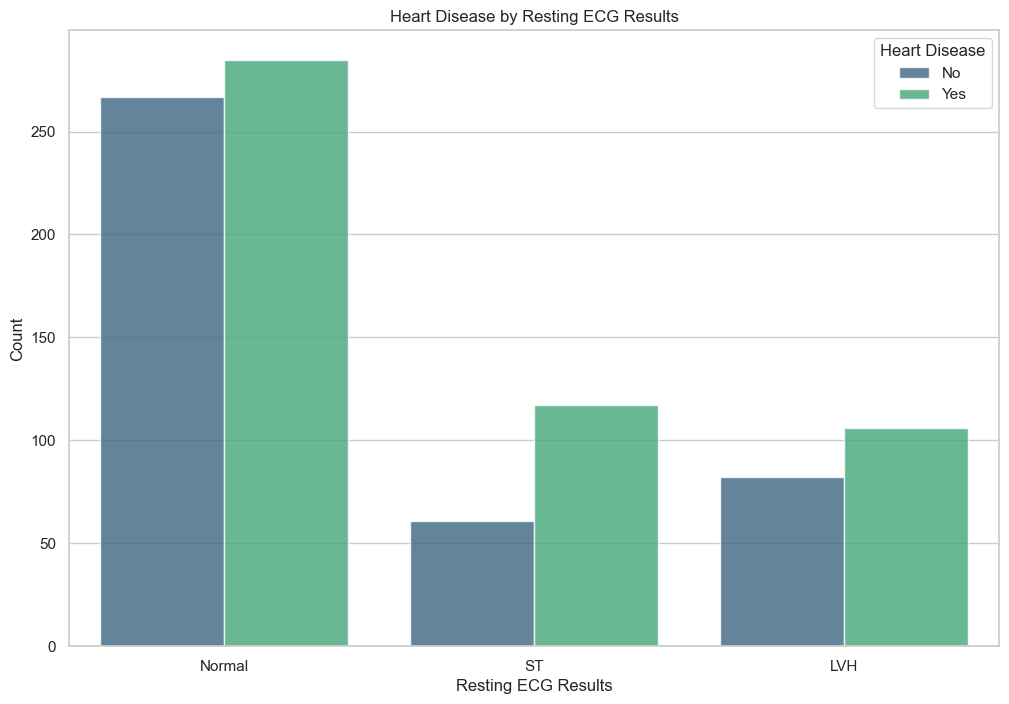

In [4129]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar chart for the count of heart disease occurrences based on RestingECG
plt.figure(figsize=(12, 8))
sns.countplot(x='RestingECG', hue='HeartDisease', data=data, palette='viridis', alpha=0.8)
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.title('Heart Disease by Resting ECG Results')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.show()

<h4>observation: when the patient is in normal state of Resting ECG  its likely for him not to have a heart failure</h4>

In [4130]:
import plotly.express as px

# Create area plots with plotly
fig = px.area(data, x='Age', y=['RestingBP', 'Cholesterol', 'MaxHR'],
              labels={'value': 'Measurement'}, title='Area Plots of Age vs. Various Measurements')

# Show the plot
fig.show()

### Pie Charts

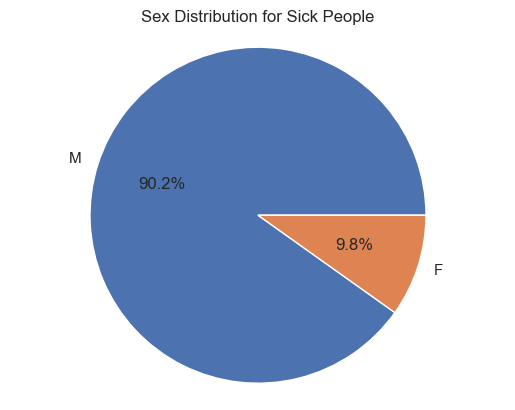

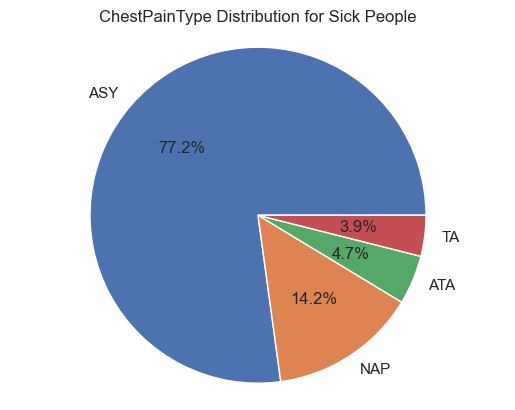

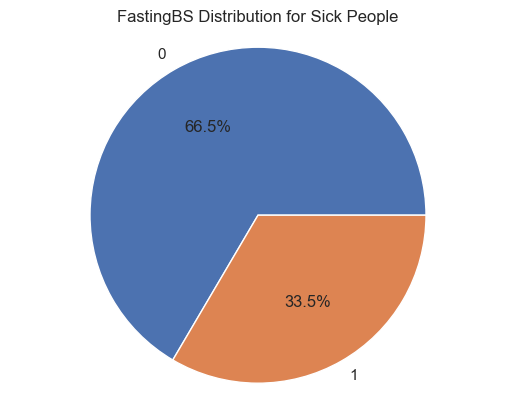

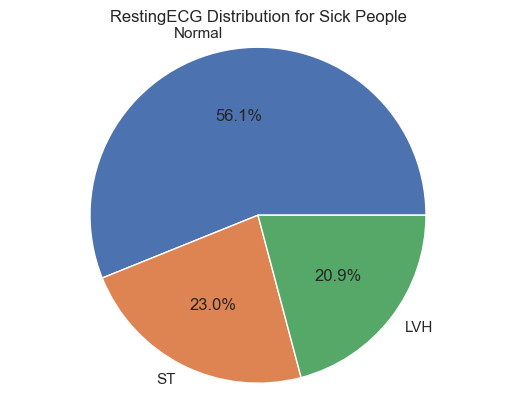

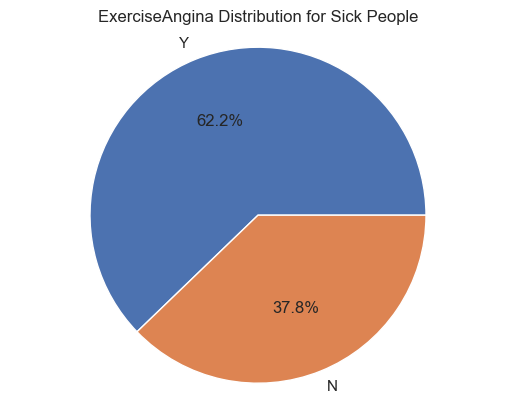

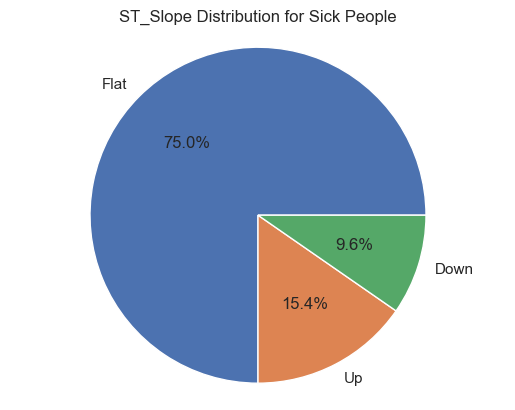

In [4131]:
# List of features to visualize
features = data.columns

# Exclude the 'HeartDisease' feature along with other specified numerical  features
exclude_features = ['HeartDisease', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
features = [feature for feature in features if feature not in exclude_features]

# Iterate over each feature
for feature in features:
    # Compute the count of each category for the current feature
    category_counts = data[data['HeartDisease'] == 1][feature].value_counts()
    
    # Create a pie chart
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'{feature} Distribution for Sick People')
    plt.axis('equal')
    
    # Display the chart
    plt.show()


### Scatter plots

C:\Users\af773\AppData\Local\Temp\ipykernel_32124\3742534257.py:17: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



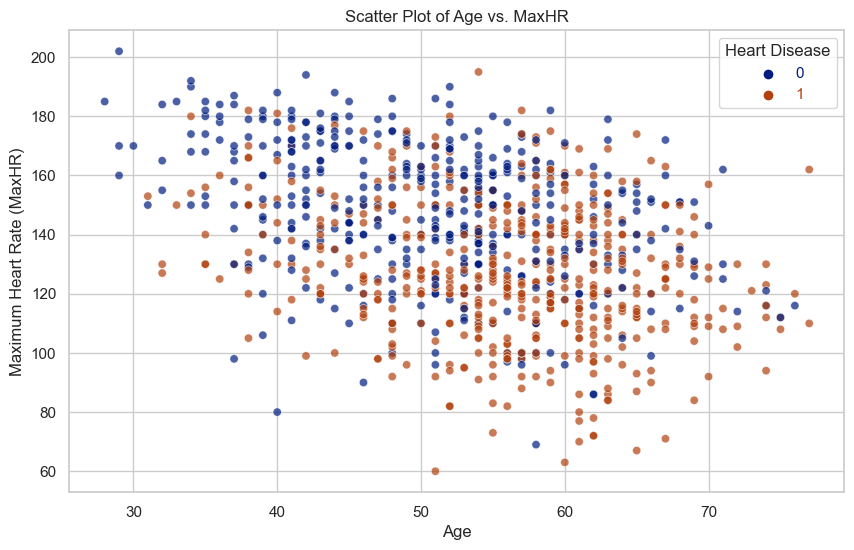

In [4132]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='MaxHR', data=data, hue='HeartDisease', palette='dark', alpha=0.7)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (MaxHR)")
plt.title("Scatter Plot of Age vs. MaxHR")

# Get the handles and labels for the legend
handles, labels = scatter.get_legend_handles_labels()

legend = plt.legend(handles, labels, title='Heart Disease', loc='upper right')
for text, color in zip(legend.get_texts(), scatter.get_legend().legendHandles):
    text.set_color(color.get_facecolor()[0])

plt.show()

C:\Users\af773\AppData\Local\Temp\ipykernel_32124\958458043.py:17: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



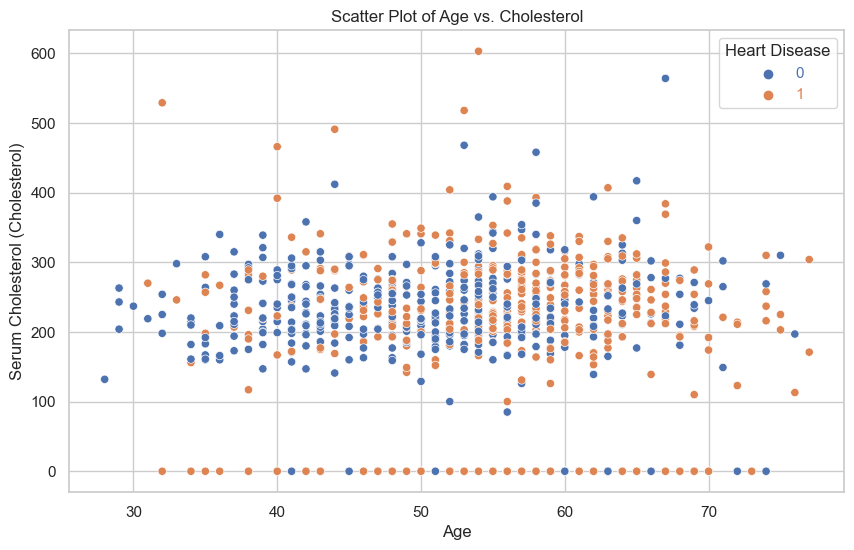

In [4133]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='Cholesterol', data=data, hue='HeartDisease')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Serum Cholesterol (Cholesterol)")
plt.title("Scatter Plot of Age vs. Cholesterol")

# Get the handles and labels for the legend
handles, labels = scatter.get_legend_handles_labels()

legend = plt.legend(handles, labels, title='Heart Disease', loc='upper right')
for text, color in zip(legend.get_texts(), scatter.get_legend().legendHandles):
    text.set_color(color.get_facecolor()[0])

plt.show()


C:\Users\af773\AppData\Local\Temp\ipykernel_32124\1405944349.py:18: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



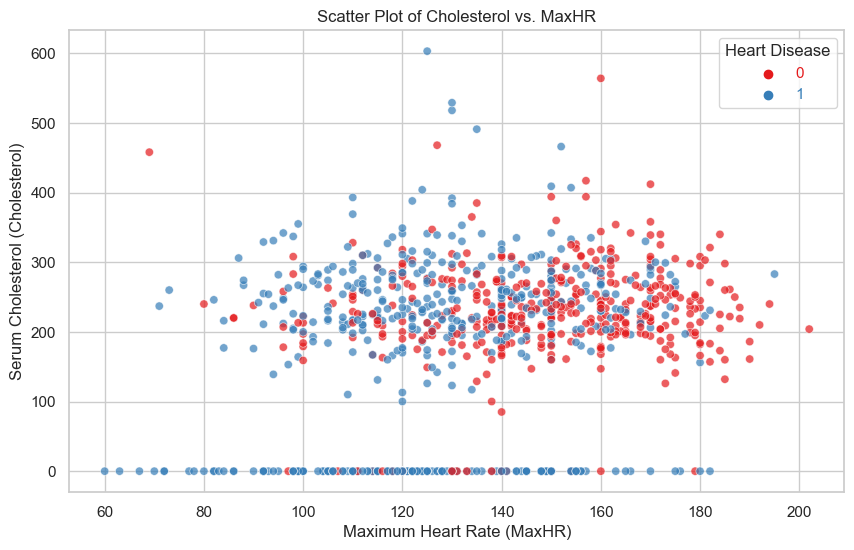

In [4134]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a scatter plot with a different color palette (e.g., 'coolwarm')
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='MaxHR', y='Cholesterol', data=data, hue='HeartDisease', palette='Set1', alpha=0.7)

# Add labels and title
plt.xlabel("Maximum Heart Rate (MaxHR)")
plt.ylabel("Serum Cholesterol (Cholesterol)")
plt.title("Scatter Plot of Cholesterol vs. MaxHR")

# Get the handles and labels for the legend
handles, labels = scatter.get_legend_handles_labels()

# Set the colors of the legend labels to match the points
legend = plt.legend(handles, labels, title='Heart Disease', loc='upper right')
for text, color in zip(legend.get_texts(), scatter.get_legend().legendHandles):
    text.set_color(color.get_facecolor()[0])

plt.show()

C:\Users\af773\AppData\Local\Temp\ipykernel_32124\3603914052.py:18: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



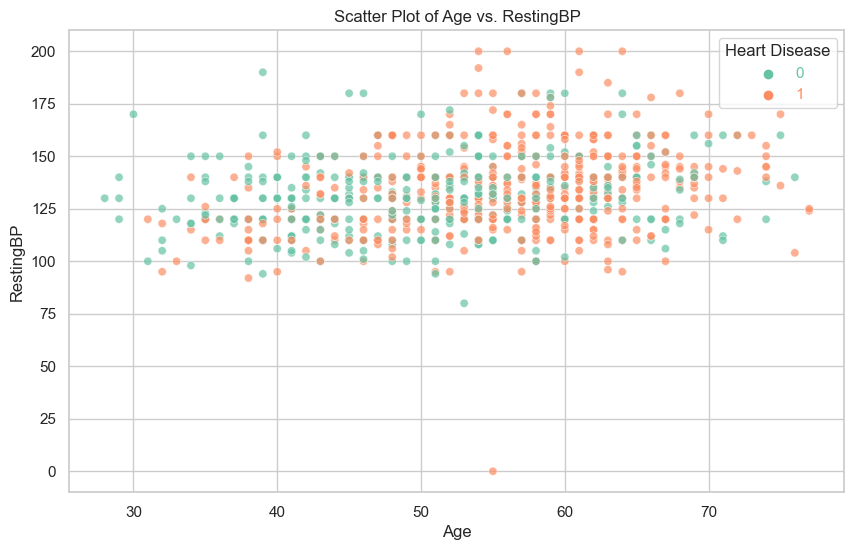

In [4135]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a scatter plot with a different color palette (e.g., 'coolwarm')
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='RestingBP', data=data, hue='HeartDisease', palette='Set2', alpha=0.7)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("RestingBP")
plt.title("Scatter Plot of Age vs. RestingBP")

# Get the handles and labels for the legend
handles, labels = scatter.get_legend_handles_labels()

# Set the colors of the legend labels to match the points
legend = plt.legend(handles, labels, title='Heart Disease', loc='upper right')
for text, color in zip(legend.get_texts(), scatter.get_legend().legendHandles):
    text.set_color(color.get_facecolor()[0])

plt.show()

### Bubble Plots

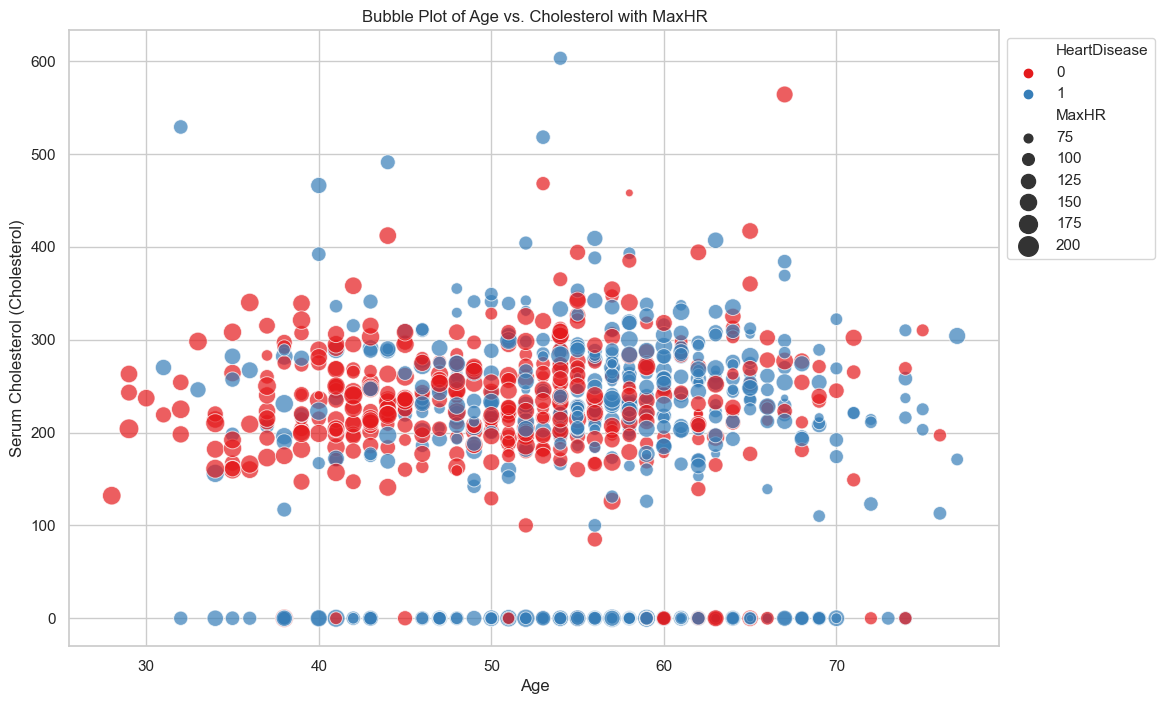

In [4136]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(x='Age', y='Cholesterol', size='MaxHR', hue='HeartDisease', data=data, palette='Set1', sizes=(20, 200), alpha=0.7)
# Add labels and title
plt.xlabel("Age")
plt.ylabel("Serum Cholesterol (Cholesterol)")
plt.title("Bubble Plot of Age vs. Cholesterol with MaxHR")

# Add a legend with a title
legend = plt.legend(title='Heart Disease', loc='upper right')
bubble_plot.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

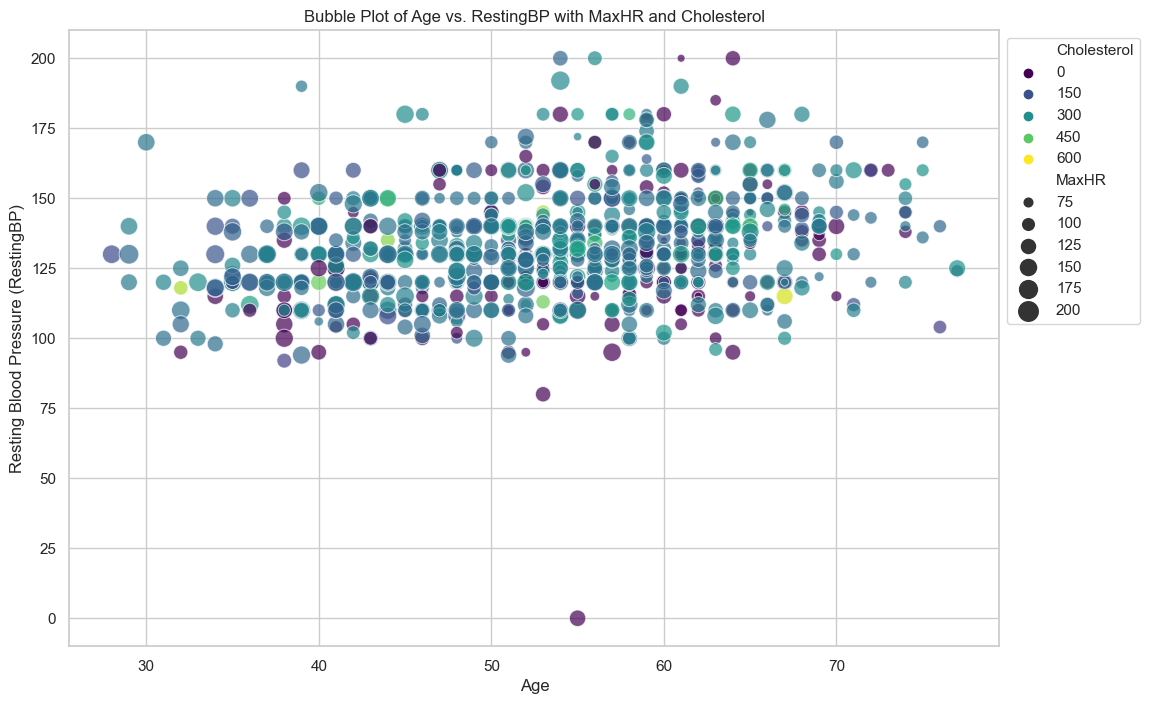

In [4137]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(x='Age', y='RestingBP', size='MaxHR', hue='Cholesterol', data=data, palette='viridis', sizes=(20, 200), alpha=0.7)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (RestingBP)")
plt.title("Bubble Plot of Age vs. RestingBP with MaxHR and Cholesterol")

# Add a legend with a title
legend = plt.legend(title='Cholesterol', loc='upper right')
bubble_plot.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

------------

## Detect and Remove outliers

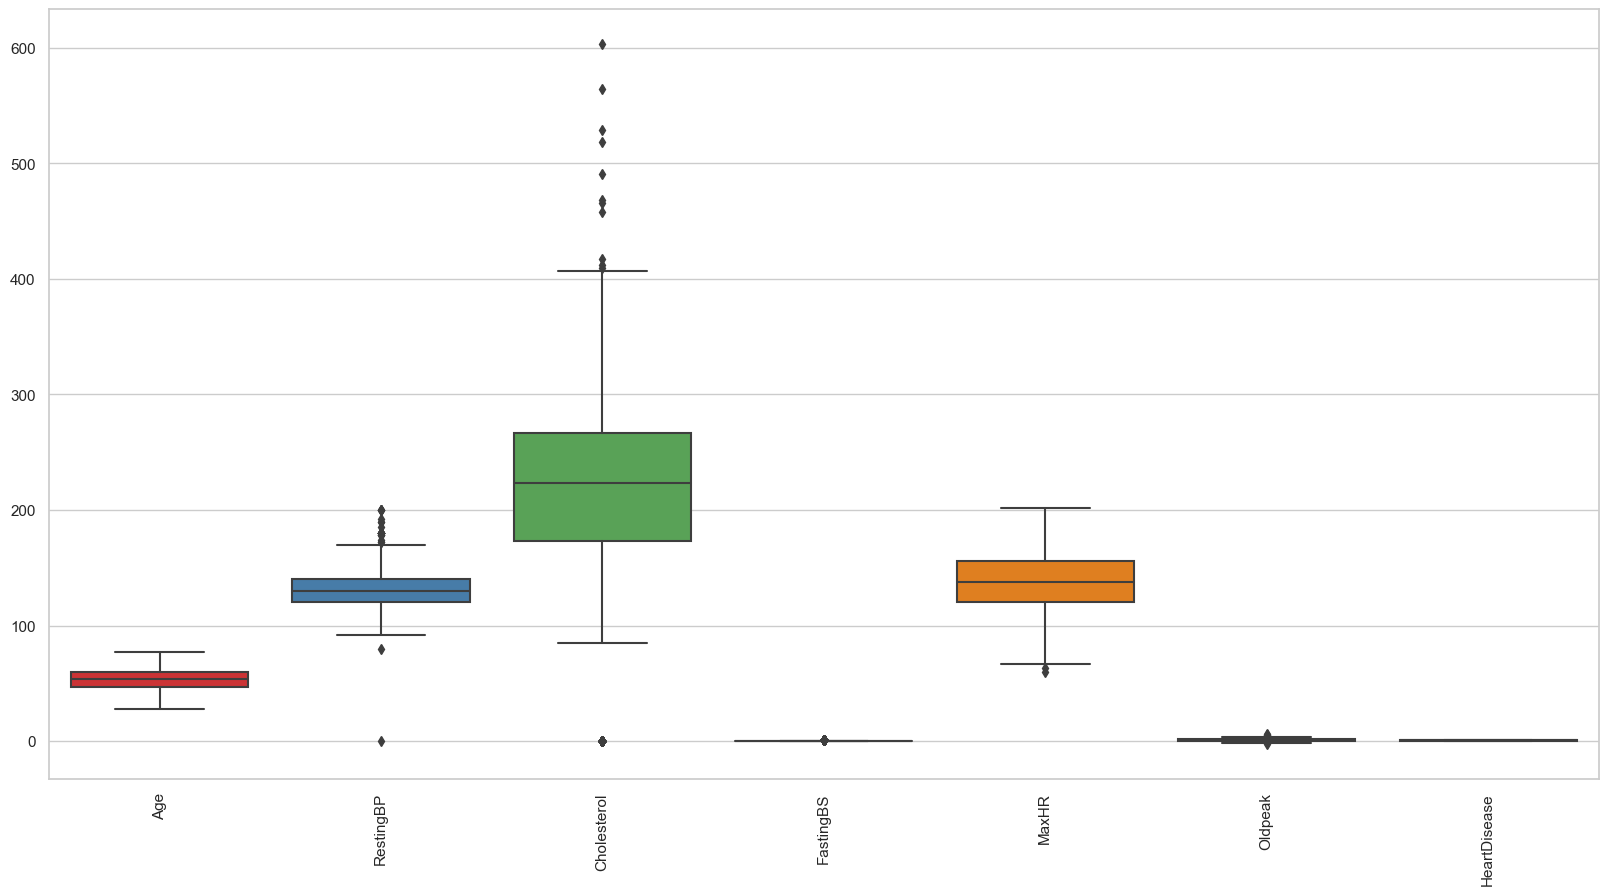

In [4138]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data,palette = "Set1" )
plt.xticks(rotation=90)
plt.show()

In [4139]:
def remove_outliers_tukey(att, data):
    # Calculate the 1st and 3rd quartiles of the attribute
    q1 = np.percentile(att, 25)
    q3 = np.percentile(att, 75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Set the lower and upper bounds for outliers removal using the Tukey's method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Print the lower and upper bounds for reference
    print('lower_bound: ', lower_bound, '-------- upper_bound: ', upper_bound)
    
    # Remove outliers by selecting data within the bounds
    data1 = data[(att > lower_bound) & (att < upper_bound)]
    
    # Calculate the number of removed outliers
    num_outliers_removed = data.shape[0] - data1.shape[0]
    
    # Print the number of removed outliers and the total number of data points
    print(num_outliers_removed, ' number of outliers removed from ', data.shape[0])
    print('******************************************************\n')
    
    # Return the data without outliers
    return data1

In [4140]:
data = remove_outliers_tukey(data.Cholesterol, data)
data = remove_outliers_tukey(data.MaxHR, data)
data = remove_outliers_tukey(data.RestingBP, data)

lower_bound:  32.625 -------- upper_bound:  407.625
183  number of outliers removed from  918
******************************************************

lower_bound:  65.0 -------- upper_bound:  217.0
0  number of outliers removed from  735
******************************************************

lower_bound:  90.0 -------- upper_bound:  170.0
32  number of outliers removed from  735
******************************************************



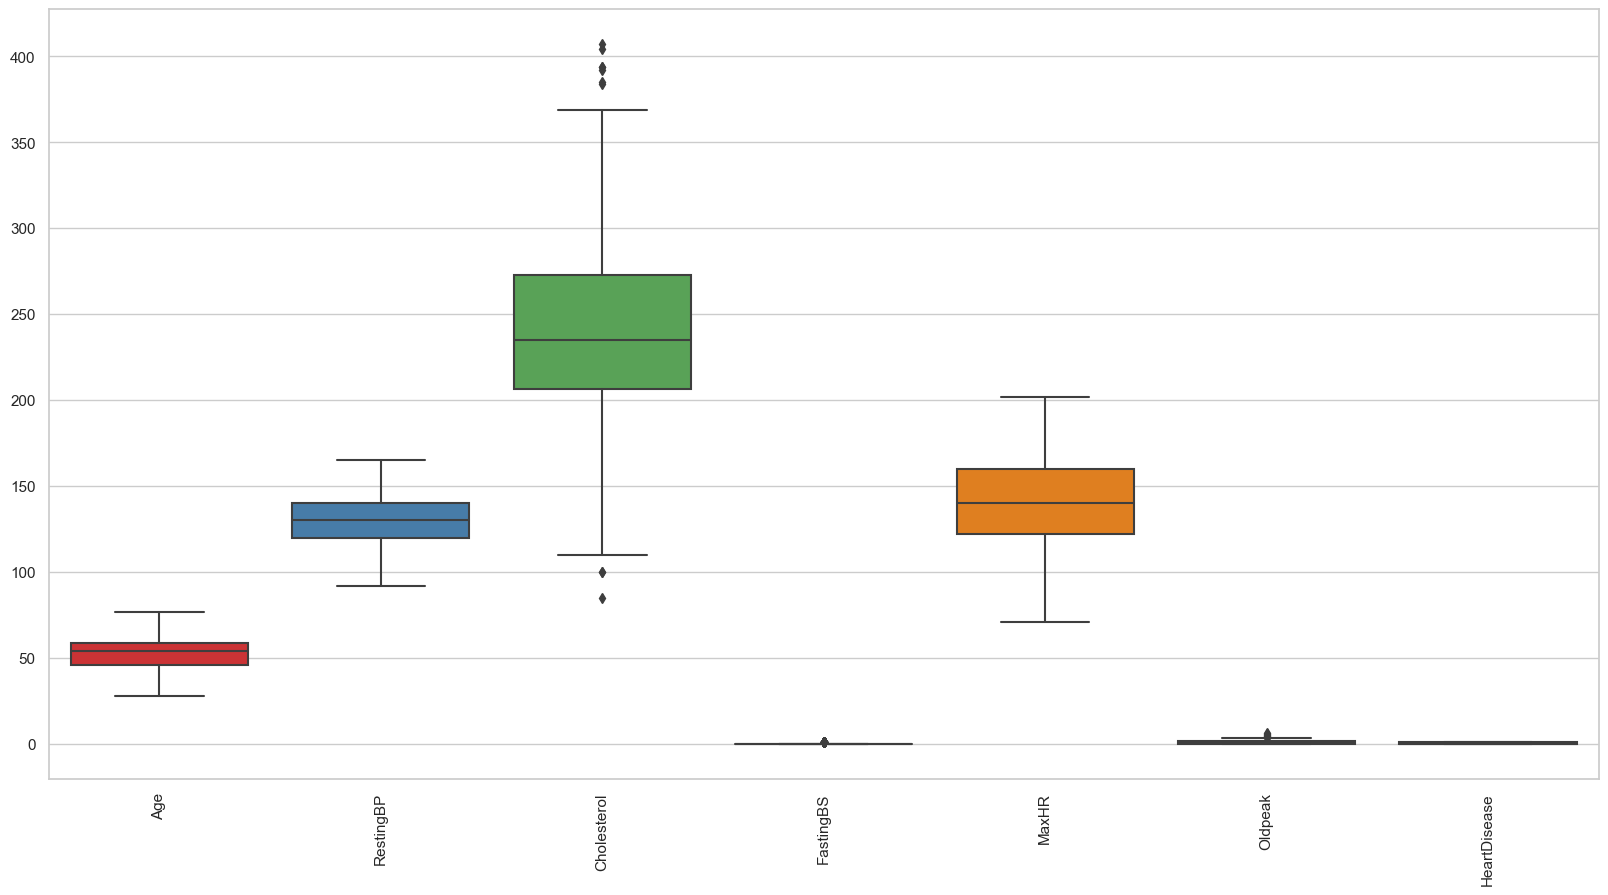

In [4141]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [4142]:
#!pip install mlxtend

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [4143]:
label_mappings = {}

# Loop through the DataFrame and convert string values to categorical representations
for column in data.columns:
    if data[column].dtype == object:  # Check if the column contains string values
        data[column], unique_values = pd.factorize(data[column])

        # Store the mappings of numeric labels to string values
        label_mappings[column] = dict(zip(range(len(unique_values)), unique_values))

# Print the mappings of numeric labels to string values
for column, mappings in label_mappings.items():
    print("Numeric labels for column", column)
    for label, value in mappings.items():
        print(label, "->", value)
    print()

Numeric labels for column Sex
0 -> M
1 -> F

Numeric labels for column ChestPainType
0 -> ATA
1 -> NAP
2 -> ASY
3 -> TA

Numeric labels for column RestingECG
0 -> Normal
1 -> ST
2 -> LVH

Numeric labels for column ExerciseAngina
0 -> N
1 -> Y

Numeric labels for column ST_Slope
0 -> Up
1 -> Flat
2 -> Down



In [4144]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [4145]:
data_input = data.drop(columns=['HeartDisease'])
data_output = data['HeartDisease']
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print("Test accuracy before scaling and normalization:")

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Test Accuracy:", knn_accuracy)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Gaussian Naive Bayes Test Accuracy:", gnb_accuracy)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Test Accuracy:", rf_accuracy)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Test Accuracy:", lr_accuracy)


Test accuracy before scaling and normalization:
KNN Test Accuracy: 0.6777251184834123
Gaussian Naive Bayes Test Accuracy: 0.8293838862559242
Random Forest Test Accuracy: 0.8483412322274881
Logistic Regression Test Accuracy: 0.8199052132701422


c:\Users\af773\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Scaling and Normalization

In [4146]:
# Handling missing values
data.dropna(inplace=True)  # Remove rows with any missing values

# Handling blank spaces
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove leading and trailing spaces in string columns
data.replace(' ', np.nan, inplace=True)  # Replace blank spaces with NaN

data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
5,39,0,1,120,339,0,0,170,0,0.0,0,0
6,45,1,0,130,237,0,0,170,0,0.0,0,0
7,54,0,0,110,208,0,0,142,0,0.0,0,0
8,37,0,2,140,207,0,0,130,1,1.5,1,1
9,48,1,0,120,284,0,0,120,0,0.0,0,0


<h3>scaling and normalization</h3>

In [4147]:
originaldata = remove_outliers_tukey(originaldata.Cholesterol, originaldata)
originaldata = remove_outliers_tukey(originaldata.MaxHR, originaldata)
originaldata = remove_outliers_tukey(originaldata.RestingBP, originaldata)
originaldata = remove_outliers_tukey(originaldata.Age, originaldata)

lower_bound:  32.625 -------- upper_bound:  407.625
183  number of outliers removed from  918
******************************************************

lower_bound:  65.0 -------- upper_bound:  217.0
0  number of outliers removed from  735
******************************************************

lower_bound:  90.0 -------- upper_bound:  170.0
32  number of outliers removed from  735
******************************************************

lower_bound:  26.5 -------- upper_bound:  78.5
0  number of outliers removed from  703
******************************************************



<h4>scaling needed featuers</h4>
<ol>
<li>RestingBP</li>
<li>Cholesterol</li>
<li>MaxHR</li>

</ol>

<h5>observation:knn algorthim is the most affected alogrthim with scaling since it basically depends on distance</h5>

<h4>normalizing needed featuers</h4>
<ol>
<li>RestingBP</li>
<li>Cholesterol</li>
<li>MaxHR</li>

</ol>

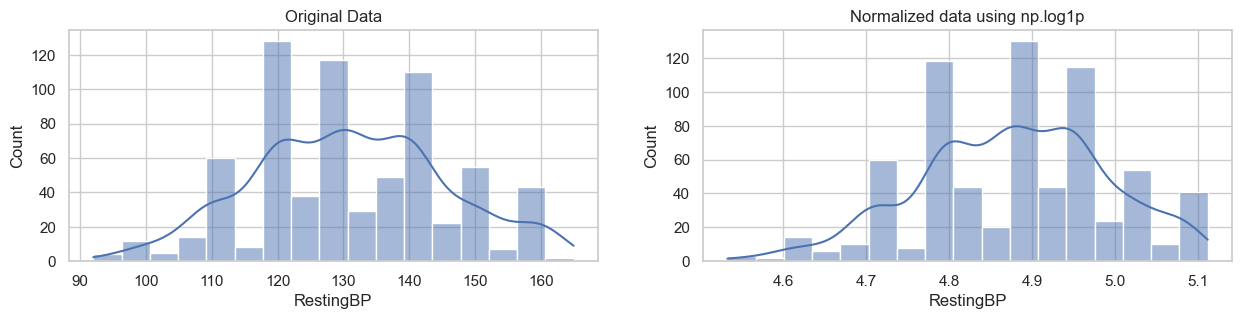

In [4148]:
normalized_cholesterol = originaldata['RestingBP']
normalized_data = np.log1p(normalized_cholesterol)
data['RestingBP'] = normalized_data
# Plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(normalized_cholesterol, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data using np.log1p")
plt.show()

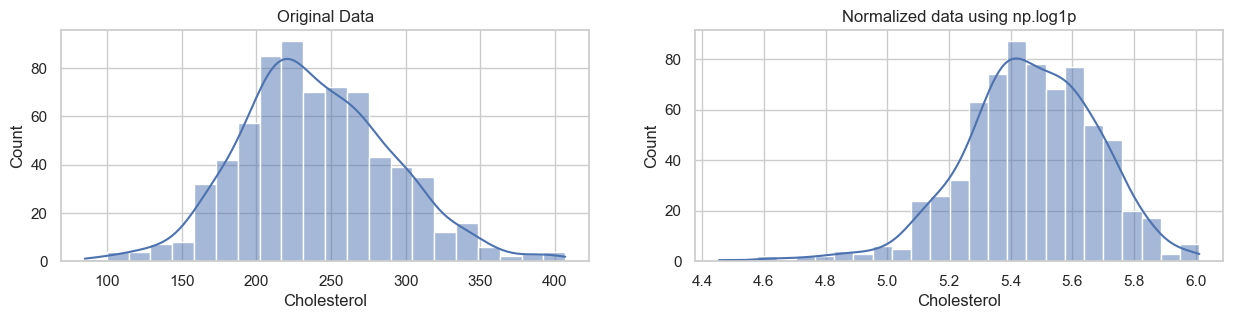

In [4149]:
normalized_cholesterol = originaldata['Cholesterol']
normalized_data = np.log1p(normalized_cholesterol)
data['Cholesterol'] = normalized_data
# Plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(normalized_cholesterol, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data using np.log1p")
plt.show()

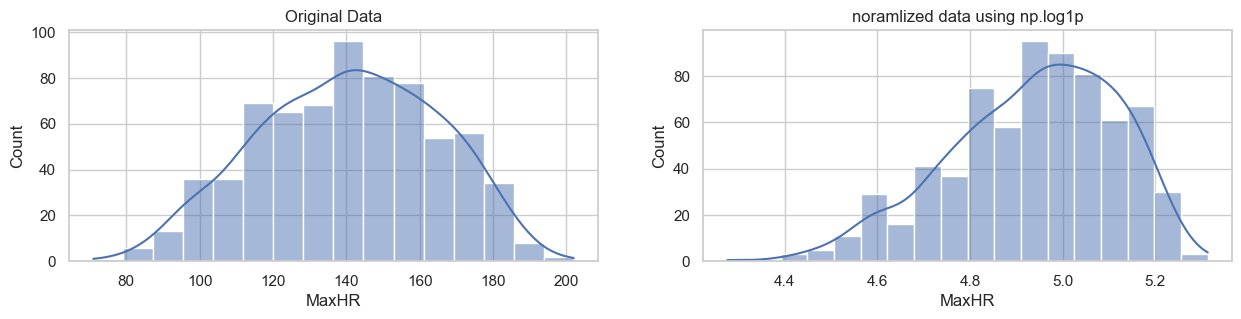

In [4150]:
normalized_MaxHR = originaldata['MaxHR']
log_transformed_data = np.log1p(normalized_MaxHR)
data['MaxHR'] =log_transformed_data
# Plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(normalized_MaxHR, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(log_transformed_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("noramlized data using np.log1p")
plt.show()

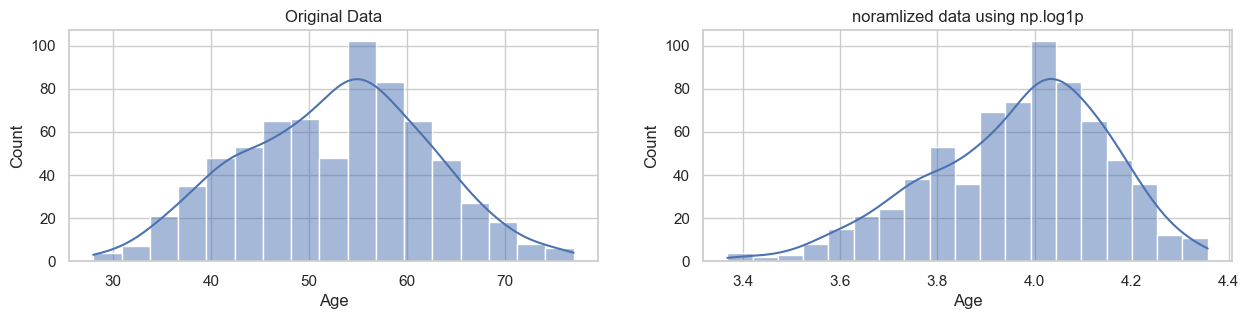

In [4151]:
normalized_Age = originaldata['Age']
log_transformed_data = np.log1p(normalized_Age)
data['Age'] =log_transformed_data
# Plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(normalized_Age, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(log_transformed_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("noramlized data using np.log1p")
plt.show()

In [4152]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,3.713572,0,0,4.948760,5.669881,0,0,5.153292,0,0.0,0,0
1,3.912023,1,1,5.081404,5.198497,0,0,5.056246,0,1.0,1,1
2,3.637586,0,0,4.875197,5.648974,0,1,4.595120,0,0.0,0,0
3,3.891820,1,2,4.934474,5.370638,0,0,4.691348,1,1.5,1,1
4,4.007333,0,1,5.017280,5.278115,0,0,4.812184,0,0.0,0,0
5,3.688879,0,1,4.795791,5.828946,0,0,5.141664,0,0.0,0,0
6,3.828641,1,0,4.875197,5.472271,0,0,5.141664,0,0.0,0,0
7,4.007333,0,0,4.709530,5.342334,0,0,4.962845,0,0.0,0,0
8,3.637586,0,2,4.948760,5.337538,0,0,4.875197,1,1.5,1,1
9,3.891820,1,0,4.795791,5.652489,0,0,4.795791,0,0.0,0,0


In [4153]:
data_input = data.drop(columns=['HeartDisease'])
data_output = data['HeartDisease']
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Test Accuracy:", knn_accuracy)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Gaussian Naive Bayes Test Accuracy:", gnb_accuracy)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Test Accuracy:", rf_accuracy)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Test Accuracy:", lr_accuracy)

KNN Test Accuracy: 0.8436018957345972
Gaussian Naive Bayes Test Accuracy: 0.8293838862559242
Random Forest Test Accuracy: 0.8483412322274881
Logistic Regression Test Accuracy: 0.8246445497630331


c:\Users\af773\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<h5>observation:knn algorthim is the most affected alogrthim with normalization since it basically depends on distance between values</h5>

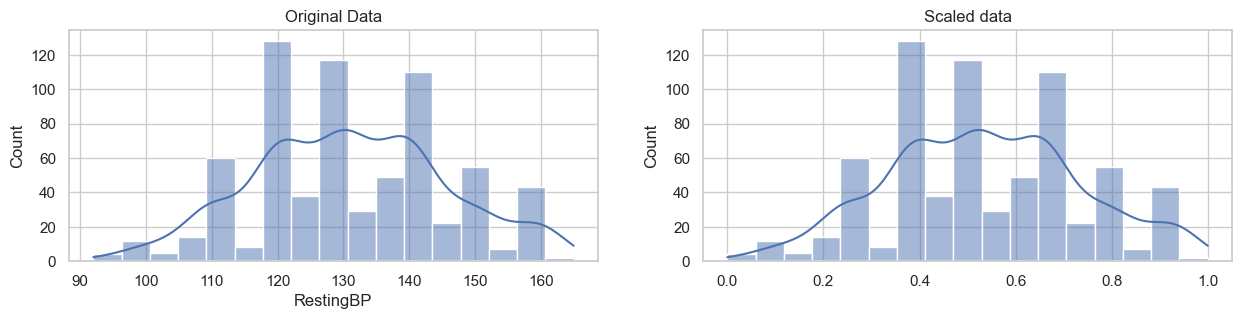

In [4154]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = originaldata['RestingBP']

# Convert original_data to a numpy array
original_data_array = original_data.values.reshape(-1, 1)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data_array, columns=[0])
data['RestingBP'] = scaled_data

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

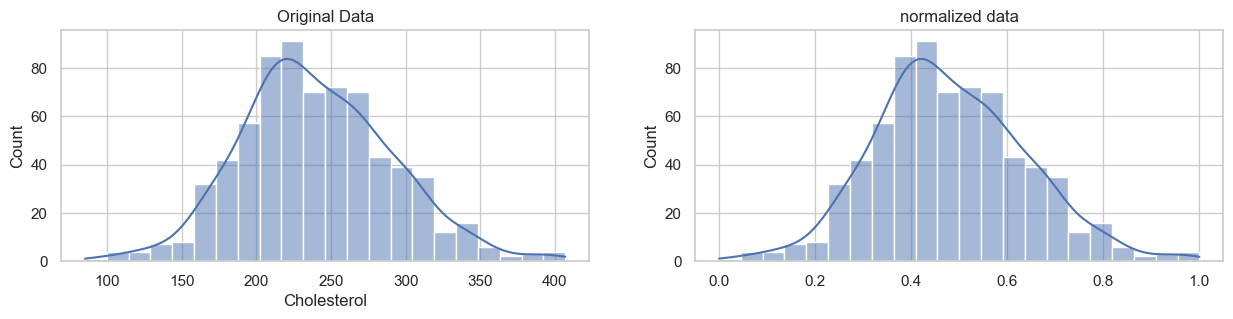

In [4155]:
# generate 1000 data points randomly drawn from an exponential distribution
scaled_cholesterol = originaldata['Cholesterol']

# Convert original_data to a numpy array
original_data_array = scaled_cholesterol.values.reshape(-1, 1)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data_array, columns=[0])
data['Cholesterol'] = scaled_data

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(scaled_cholesterol, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("normalized data")
plt.show()

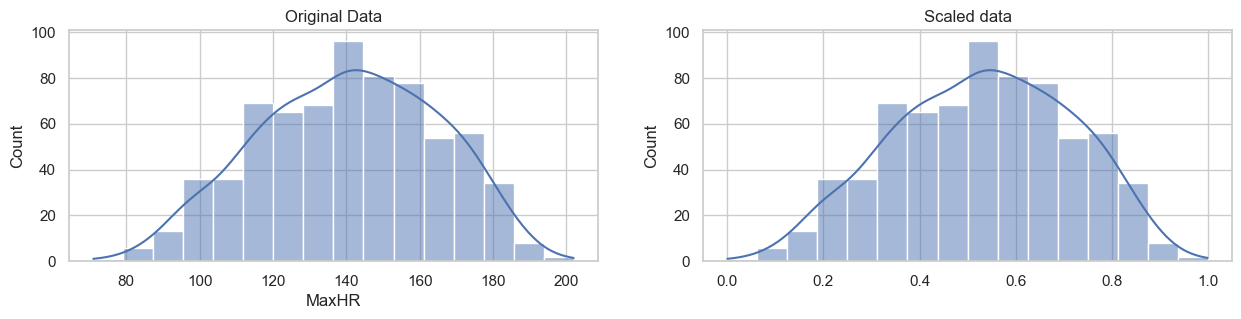

In [4156]:
# generate 1000 data points randomly drawn from an exponential distribution
scaled_MaxHR =originaldata['MaxHR']

# Convert original_data to a numpy array
original_data_array = scaled_MaxHR.values.reshape(-1, 1)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data_array, columns=[0])
data['MaxHR'] = scaled_data

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(scaled_MaxHR, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

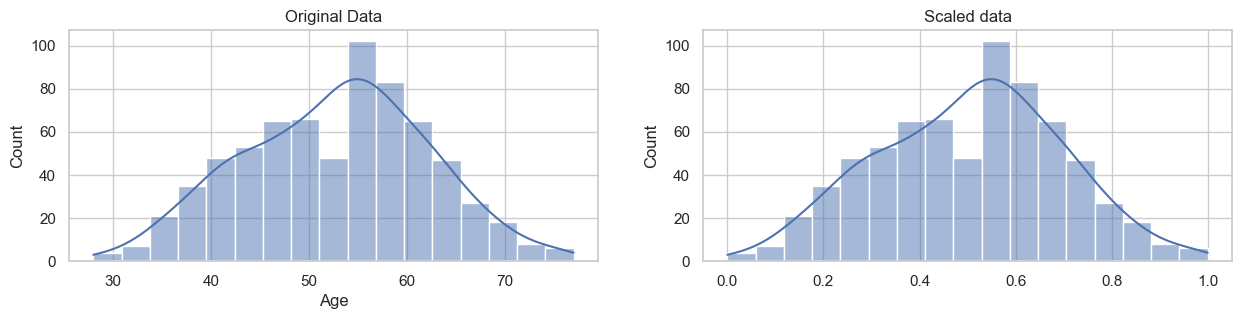

In [4157]:
# generate 1000 data points randomly drawn from an exponential distribution
scaled_Age = originaldata['Age']

# Convert original_data to a numpy array
original_data_array = scaled_Age.values.reshape(-1, 1)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data_array, columns=[0])
data['Age'] = scaled_data

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(scaled_Age, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [4158]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,0,0,0.657534,0.633540,0,0,0.770992,0,0.0,0,0
1,0.428571,1,1,0.931507,0.295031,0,0,0.648855,0,1.0,1,1
2,0.183673,0,0,0.520548,0.614907,0,1,0.206107,0,0.0,0,0
3,0.408163,1,2,0.630137,0.400621,0,0,0.282443,1,1.5,1,1
4,0.530612,0,1,0.794521,0.341615,0,0,0.389313,0,0.0,0,0
5,0.224490,0,1,0.383562,0.788820,0,0,0.755725,0,0.0,0,0
6,0.346939,1,0,0.520548,0.472050,0,0,0.755725,0,0.0,0,0
7,0.530612,0,0,0.246575,0.381988,0,0,0.541985,0,0.0,0,0
8,0.183673,0,2,0.657534,0.378882,0,0,0.450382,1,1.5,1,1
9,0.408163,1,0,0.383562,0.618012,0,0,0.374046,0,0.0,0,0


In [4159]:
data_input = data.drop(columns=['HeartDisease'])
data_output = data['HeartDisease']
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)



# Assuming X and y are your features and labels


# Initialize the classifiers
knn = KNeighborsClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()
lr = LogisticRegression()

# Fit the classifiers on the scaled training data
knn.fit(X_train, y_train)
gnb.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predict the labels for the scaled test data
knn_pred = knn.predict(X_test)
gnb_pred = gnb.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)

# Calculate the accuracy scores
knn_accuracy = accuracy_score(y_test, knn_pred)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print the accuracy scores
print("KNN Test Accuracy:", knn_accuracy)
print("Gaussian Naive Bayes Test Accuracy:", gnb_accuracy)
print("Random Forest Test Accuracy:", rf_accuracy)
print("Logistic Regression Test Accuracy:", lr_accuracy)



KNN Test Accuracy: 0.8625592417061612
Gaussian Naive Bayes Test Accuracy: 0.8293838862559242
Random Forest Test Accuracy: 0.8720379146919431
Logistic Regression Test Accuracy: 0.8293838862559242


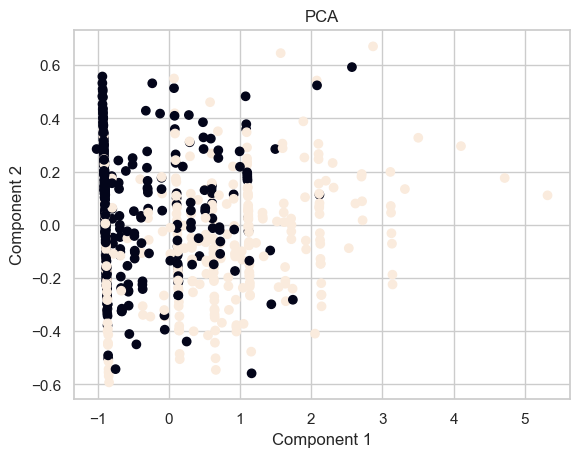

In [4160]:
X = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
y = data['HeartDisease']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [4161]:
X = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
y = data['HeartDisease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the classifiers
knn = KNeighborsClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()
lr = LogisticRegression()

# Fit the classifiers on the reduced training data
knn.fit(X_train_pca, y_train)
gnb.fit(X_train_pca, y_train)
rf.fit(X_train_pca, y_train)
lr.fit(X_train_pca, y_train)

# Predict the labels for the reduced test data
knn_pred = knn.predict(X_test_pca)
gnb_pred = gnb.predict(X_test_pca)
rf_pred = rf.predict(X_test_pca)
lr_pred = lr.predict(X_test_pca)

# Calculate the accuracy scores
knn_accuracy = accuracy_score(y_test, knn_pred)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print the accuracy scores after dimensionality reduction
print("KNN Test Accuracy after PCA:", knn_accuracy)
print("Gaussian Naive Bayes Test Accuracy after PCA:", gnb_accuracy)
print("Random Forest Test Accuracy after PCA:", rf_accuracy)
print("Logistic Regression Test Accuracy after PCA:", lr_accuracy)

KNN Test Accuracy after PCA: 0.7203791469194313
Gaussian Naive Bayes Test Accuracy after PCA: 0.7630331753554502
Random Forest Test Accuracy after PCA: 0.7109004739336493
Logistic Regression Test Accuracy after PCA: 0.7677725118483413


## Eliminating blank spaces or missing information

### Label encoding for categorical data


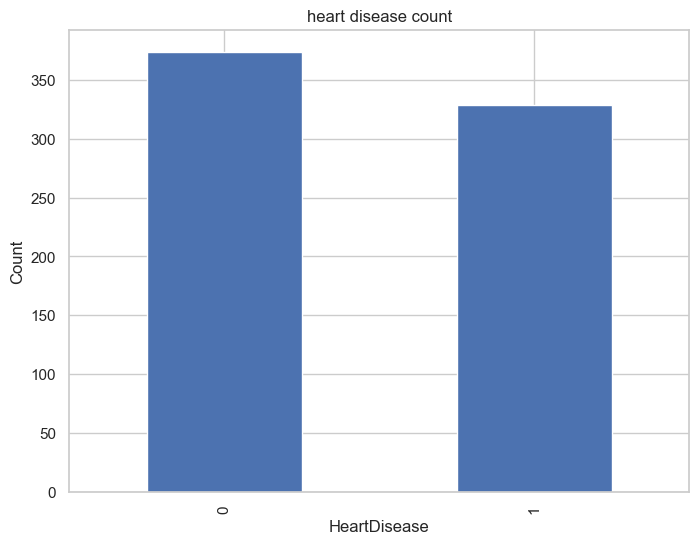

In [4162]:
#visiualizing the target col
plt.figure(figsize=(8,6))
data['HeartDisease'].value_counts().plot(kind='bar')
plt.title("heart disease count")
plt.ylabel("Count")
plt.show()

-------------------


<h3>Data split</h3>

In [4163]:
from sklearn.model_selection import train_test_split
data_input = data.drop(columns=['HeartDisease'])
data_output = data['HeartDisease']
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)



# Print the shapes of the datasets
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('-----------------------------')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)
print('-----------------------------')
print('X_val: ', X_val.shape)
print('y_val: ', y_val.shape)

X_train:  (344, 11)
y_train:  (344,)
-----------------------------
X_test:  (211, 11)
y_test:  (211,)
-----------------------------
X_val:  (148, 11)
y_val:  (148,)


### K-nearst neighbour

In [4164]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

n_neighbours_values = list(range(1, 110))
accuracy_train_values = []
accuracy_val_values = []

for n_neighbours in n_neighbours_values:
    model = KNeighborsClassifier(n_neighbors = n_neighbours)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append(accuracy_train)
    accuracy_val_values.append(accuracy_val)
    
results = pd.DataFrame({
    'n_neighbours': n_neighbours_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

In [4165]:
results

,n_neighbours,accuracy_train,accuracy_val
0,1,1.000000,0.831081
1,2,0.886628,0.824324
2,3,0.886628,0.831081
3,4,0.880814,0.837838
4,5,0.875000,0.844595
...,...,...,...
104,105,0.790698,0.810811
105,106,0.787791,0.817568
106,107,0.787791,0.810811
107,108,0.790698,0.817568


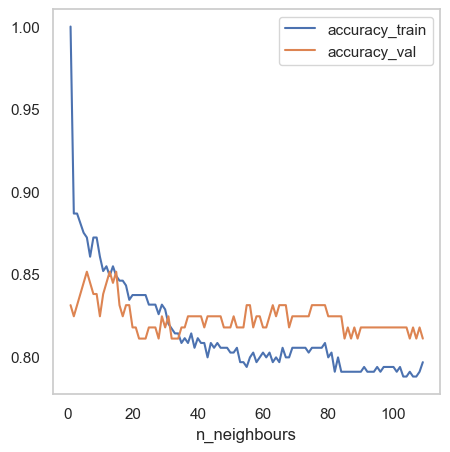

In [4166]:
%matplotlib inline

results.plot(x='n_neighbours', y=['accuracy_train', 'accuracy_val'], figsize=(5, 5))
plt.grid(axis='both')

In [4167]:
data.shape

(703, 12)

In [4168]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=15)  # You can specify the number of neighbors (k) as desired

# Train the k-NN classifier
knn.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = knn.predict(X_val)

# Evaluate the performance on the validation set (example using accuracy)
accuracy_val = knn.score(X_val, y_val)
print("Validation Accuracy:", accuracy_val)

# Predict on the test set
y_pred_test = knn.predict(X_test)

# Evaluate the performance on the test set (example using accuracy)
accuracy_test = knn.score(X_test, y_test)
knn_test_accuracy=accuracy_test
print("Test Accuracy:", accuracy_test)

# Predict on the training set
y_pred_train = knn.predict(X_train)

# Evaluate the performance on the training set (example using accuracy)
accuracy_train = knn.score(X_train, y_train)
print("Training Accuracy:", accuracy_train)


Validation Accuracy: 0.8513513513513513
Test Accuracy: 0.8625592417061612
Training Accuracy: 0.8488372093023255


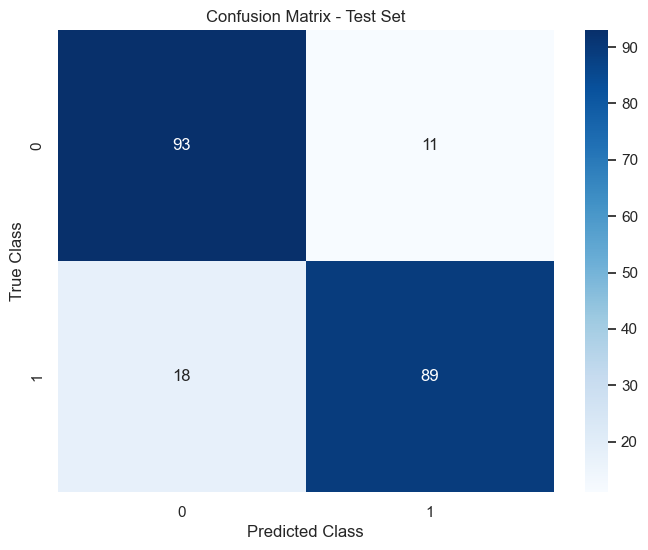

In [4169]:
# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [4170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

# Assuming you have already loaded your data into X and y

# Perform the initial train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=15)

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = knn.predict(X_val)

# Evaluate the model on the validation set using recall
val_recall = recall_score(y_val, y_val_pred, average='weighted')
print(f'Validation Recall: {val_recall:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred = knn.predict(X_test)

# Evaluate the model on the test set using recall
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print(f'Test Recall: {test_recall:.2f}')

# Additionally, you can evaluate the model on the training set using recall
y_train_pred = knn.predict(X_train)
train_recall = recall_score(y_train, y_train_pred, average='weighted')
print(f'Training Recall: {train_recall:.2f}')


Validation Recall: 0.81
Test Recall: 0.88
Training Recall: 0.86


In [4171]:
from sklearn.metrics import precision_score

# Evaluate the model on the test set using precision
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print(f'Test Precision: {test_precision:.2f}')

# Additionally, you can evaluate the model on the training set using precision
y_train_pred = knn.predict(X_train)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
print(f'Training Precision: {train_precision:.2f}')

# Evaluate the model on the validation set using precision
y_val_pred = knn.predict(X_val)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
print(f'Validation Precision: {val_precision:.2f}')

Test Precision: 0.88
Training Precision: 0.86
Validation Precision: 0.81


In [4172]:
# Evaluate the model on the validation set using recall (sensitivity)
val_sensitivity = recall_score(y_val, y_val_pred, average='weighted')
print(f'Validation Sensitivity (Recall): {val_sensitivity:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred = knn.predict(X_test)

# Evaluate the model on the test set using recall (sensitivity)
test_sensitivity = recall_score(y_test, y_test_pred, average='weighted')
print(f'Test Sensitivity (Recall): {test_sensitivity:.2f}')

# Additionally, you can evaluate the model on the training set using recall (sensitivity)
y_train_pred = knn.predict(X_train)
train_sensitivity = recall_score(y_train, y_train_pred, average='weighted')
print(f'Training Sensitivity (Recall): {train_sensitivity:.2f}')

Validation Sensitivity (Recall): 0.81
Test Sensitivity (Recall): 0.88
Training Sensitivity (Recall): 0.86


In [4173]:
# Calculate confusion matrix for binary classification on the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Calculate specificity on the training set
true_negatives_train = conf_matrix_train[0, 0]
false_positives_train = conf_matrix_train[0, 1]
specificity_train = true_negatives_train / (true_negatives_train + false_positives_train)

print(f'Training Specificity: {specificity_train:.2f}')

# Calculate confusion matrix for binary classification on the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Calculate specificity on the validation set
true_negatives_val = conf_matrix_val[0, 0]
false_positives_val = conf_matrix_val[0, 1]
specificity_val = true_negatives_val / (true_negatives_val + false_positives_val)

print(f'Validation Specificity: {specificity_val:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred = knn.predict(X_test)

# Calculate confusion matrix for binary classification on the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Calculate specificity on the test set
true_negatives_test = conf_matrix_test[0, 0]
false_positives_test = conf_matrix_test[0, 1]
specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)

print(f'Test Specificity: {specificity_test:.2f}')

Training Specificity: 0.86
Validation Specificity: 0.86
Test Specificity: 0.86


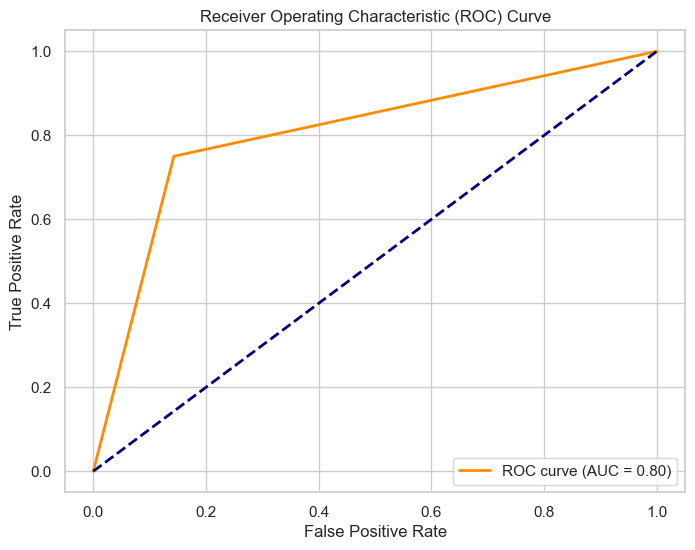

Test AUC: 0.94


In [4174]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred )
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_prob = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the AUC for the test set
print(f'Test AUC: {roc_auc_test:.2f}')


### Naive Bayes

- Gaussian Naive Bayes:
Gaussian Naive Bayes assumes that the features follow a Gaussian (normal) distribution. It is suitable for continuous numerical features. This classifier estimates the mean and standard deviation of each feature for each class and uses them to calculate the probability of a particular feature value belonging to a specific class.

- Multinomial Naive Bayes:
Multinomial Naive Bayes is designed for discrete features, particularly those that represent count or frequency-based data. It assumes that features have a multinomial distribution, commonly used in text classification tasks. This classifier calculates the probability of each feature occurring in each class and uses these probabilities to make predictions.

- Bernoulli Naive Bayes:
Bernoulli Naive Bayes is specifically designed for binary or Boolean features. It assumes that each feature follows a Bernoulli distribution, where it can take on one of two possible values: 0 or 1. This classifier calculates the probability of each feature being 0 or 1 in each class and uses these probabilities for prediction. It is commonly used in text classification tasks where features represent the presence or absence of words.

- Complement Naive Bayes:
Complement Naive Bayes is a variant of Naive Bayes that aims to handle imbalanced class distribution. It considers the complement of each feature's probability when estimating class conditional probabilities, giving more weight to the minority class. It effectively addresses class imbalance by estimating probabilities from the perspective of the majority class. Complement Naive Bayes can be useful in text classification tasks with imbalanced classes.

Each variant of Naive Bayes makes different assumptions about the data distribution and is suitable for different types of features and classification problems. It's important to choose the appropriate variant based on the nature of the data and the problem at hand to achieve accurate and reliable predictions.

In [4175]:
# Define the Bernoulli Naive Bayes model
nb = BernoulliNB()

# Fit the model to the training data
nb.fit(X_train, y_train)



BernoulliNB()

In [4176]:
# Evaluate the model's performance on the validation set
y_pred_val_bernoulli = nb.predict(X_val)
accuracy_val_bernoulli = accuracy_score(y_val, y_pred_val_bernoulli)

print("Validation accuracy:", accuracy_val_bernoulli * 100, "%")

# Evaluate the model's performance on the training set
y_pred_train_bernoulli = nb.predict(X_train)
accuracy_train_bernoulli = accuracy_score(y_train, y_pred_train_bernoulli)
print("Training accuracy:", accuracy_train_bernoulli * 100, "%")

# Evaluate the model's performance on the test set
y_pred_test_bernoulli = nb.predict(X_test)
accuracy_test_bernoulli = accuracy_score(y_test, y_pred_test_bernoulli)
print("Test accuracy:", accuracy_test_bernoulli * 100, "%")


Validation accuracy: 81.08108108108108 %
Training accuracy: 83.43023255813954 %
Test accuracy: 83.78378378378379 %


In [4177]:
# Predict on the validation set using Bernoulli Naive Bayes
y_val_pred_bernoulli = nb.predict(X_val)

# Evaluate the model on the validation set using precision
precision_val_bernoulli = precision_score(y_val, y_val_pred_bernoulli, average='weighted')
print(f'Validation Precision: {precision_val_bernoulli:.2f}')

# Predict on the test set using Bernoulli Naive Bayes
y_test_pred_bernoulli = nb.predict(X_test)

# Evaluate the model on the test set using precision
precision_test_bernoulli = precision_score(y_test, y_test_pred_bernoulli, average='weighted')
print(f'Test Precision: {precision_test_bernoulli:.2f}')

# Additionally, you can evaluate the model on the training set using precision
y_train_pred_bernoulli = nb.predict(X_train)
precision_train_bernoulli = precision_score(y_train, y_train_pred_bernoulli, average='weighted')
print(f'Training Precision: {precision_train_bernoulli:.2f}')

Validation Precision: 0.81
Test Precision: 0.84
Training Precision: 0.83


In [4178]:
# Evaluate the model on the validation set using recall
recall_val_bernoulli = recall_score(y_val, y_val_pred_bernoulli, average='weighted')
print(f'Validation Recall: {recall_val_bernoulli:.2f}')

# Evaluate the model on the test set using recall
recall_test_bernoulli = recall_score(y_test, y_test_pred_bernoulli, average='weighted')
print(f'Test Recall: {recall_test_bernoulli:.2f}')

# Additionally, you can evaluate the model on the training set using recall
y_train_pred_bernoulli = nb.predict(X_train)
recall_train_bernoulli = recall_score(y_train, y_train_pred_bernoulli, average='weighted')
print(f'Training Recall: {recall_train_bernoulli:.2f}')

Validation Recall: 0.81
Test Recall: 0.84
Training Recall: 0.83


In [4179]:
# Predict on the validation set
y_val_pred_bernoulli = nb.predict(X_val)

# Evaluate the model on the validation set using sensitivity (recall)
sensitivity_val_bernoulli = recall_score(y_val, y_val_pred_bernoulli, average='weighted')
print(f'Validation Sensitivity (Recall): {sensitivity_val_bernoulli:.2f}')

# Predict on the test set
y_test_pred_bernoulli = nb.predict(X_test)

# Evaluate the model on the test set using sensitivity (recall)
sensitivity_test_bernoulli = recall_score(y_test, y_test_pred_bernoulli, average='weighted')
print(f'Test Sensitivity (Recall): {sensitivity_test_bernoulli:.2f}')

# Additionally, you can evaluate the model on the training set using sensitivity (recall)
y_train_pred_bernoulli = nb.predict(X_train)
sensitivity_train_bernoulli = recall_score(y_train, y_train_pred_bernoulli, average='weighted')
print(f'Training Sensitivity (Recall): {sensitivity_train_bernoulli:.2f}')

Validation Sensitivity (Recall): 0.81
Test Sensitivity (Recall): 0.84
Training Sensitivity (Recall): 0.83


In [4180]:
# Calculate confusion matrix for binary classification on the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred_bernoulli)

# Calculate specificity for the training set
true_negatives_train = conf_matrix_train[0, 0]
false_positives_train = conf_matrix_train[0, 1]
specificity_train_bernoulli = true_negatives_train / (true_negatives_train + false_positives_train)
print(f'Training Specificity: {specificity_train_bernoulli:.2f}')

# Calculate confusion matrix for binary classification on the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred_bernoulli)

# Calculate specificity for the validation set
true_negatives_val = conf_matrix_val[0, 0]
false_positives_val = conf_matrix_val[0, 1]
specificity_val_bernoulli = true_negatives_val / (true_negatives_val + false_positives_val)
print(f'Validation Specificity: {specificity_val_bernoulli:.2f}')

#evaluate it on the test set
y_test_pred_bernoulli = nb.predict(X_test)

# Calculate confusion matrix for binary classification on the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred_bernoulli)

# Calculate specificity for the test set
true_negatives_test = conf_matrix_test[0, 0]
false_positives_test = conf_matrix_test[0, 1]
specificity_test_bernoulli = true_negatives_test / (true_negatives_test + false_positives_test)
print(f'Test Specificity: {specificity_test_bernoulli:.2f}')

Training Specificity: 0.83
Validation Specificity: 0.86
Test Specificity: 0.84


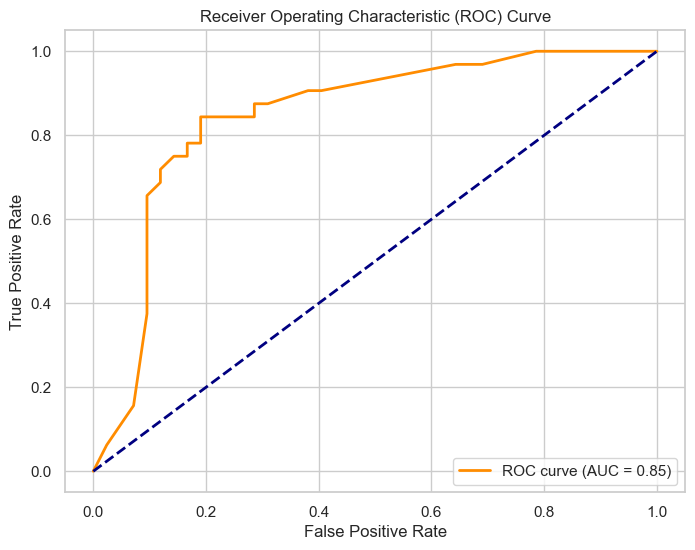

Test AUC: 0.91


In [4181]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into X and y

# Define the Bernoulli Naive Bayes model
nb = BernoulliNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_prob_bernoulli = nb.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_bernoulli)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_prob_bernoulli = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob_bernoulli)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the AUC for the test set
print(f'Test AUC: {roc_auc_test:.2f}')

In [4182]:
# Define the guassian Naive Bayes model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

GaussianNB()

In [4183]:
# Evaluate the model's performance on the validation set
y_pred_val_guassian = nb.predict(X_val)
accuracy_val_guassian = accuracy_score(y_val, y_pred_val_guassian)

print("Validation accuracy:", accuracy_val_guassian * 100, "%")

# Evaluate the model's performance on the training set
y_pred_train_guassian = nb.predict(X_train)
accuracy_train_guassian = accuracy_score(y_train, y_pred_train_guassian)
print("Training accuracy:", accuracy_train_guassian * 100, "%")

# Evaluate the model's performance on the test set
y_pred_test_guassian = nb.predict(X_test)
accuracy_test_guassian = accuracy_score(y_test, y_pred_test_guassian)

print("Test accuracy:", accuracy_test_guassian * 100, "%")


Validation accuracy: 83.78378378378379 %
Training accuracy: 83.72093023255815 %
Test accuracy: 91.8918918918919 %


In [4184]:
# Evaluate the model on the validation set using precision
precision_val_gaussian = precision_score(y_val, y_pred_val_guassian, average='weighted')
print(f'Validation Precision: {precision_val_gaussian:.2f}')

# Predict on the test set
y_test_pred_gaussian = nb.predict(X_test)

# Evaluate the model on the test set using precision
precision_test_gaussian = precision_score(y_test, y_test_pred_gaussian, average='weighted')
print(f'Test Precision: {precision_test_gaussian:.2f}')

# Additionally, you can evaluate the model on the training set using precision
y_train_pred_gaussian = nb.predict(X_train)
precision_train_gaussian = precision_score(y_train, y_train_pred_gaussian, average='weighted')
print(f'Training Precision: {precision_train_gaussian:.2f}')

Validation Precision: 0.84
Test Precision: 0.92
Training Precision: 0.84


In [4185]:
# Evaluate the model on the validation set using recall
recall_val_gaussian = recall_score(y_val, y_pred_val_guassian, average='weighted')
print(f'Validation Recall: {recall_val_gaussian:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred_gaussian = nb.predict(X_test)

# Evaluate the model on the test set using recall
recall_test_gaussian = recall_score(y_test, y_test_pred_gaussian, average='weighted')
print(f'Test Recall: {recall_test_gaussian:.2f}')

# Additionally, you can evaluate the model on the training set using recall
y_train_pred_gaussian = nb.predict(X_train)
recall_train_gaussian = recall_score(y_train, y_train_pred_gaussian, average='weighted')
print(f'Training Recall: {recall_train_gaussian:.2f}')


Validation Recall: 0.84
Test Recall: 0.92
Training Recall: 0.84


In [4186]:
# Evaluate the model on the validation set using sensitivity (recall)
sensitivity_val_gaussian = recall_score(y_val, y_pred_val_guassian, average='weighted')
print(f'Validation Sensitivity (Recall): {sensitivity_val_gaussian:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred_gaussian = nb.predict(X_test)

# Evaluate the model on the test set using sensitivity (recall)
sensitivity_test_gaussian = recall_score(y_test, y_test_pred_gaussian, average='weighted')
print(f'Test Sensitivity (Recall): {sensitivity_test_gaussian:.2f}')

# Additionally, you can evaluate the model on the training set using sensitivity (recall)
y_train_pred_gaussian = nb.predict(X_train)
sensitivity_train_gaussian = recall_score(y_train, y_train_pred_gaussian, average='weighted')
print(f'Training Sensitivity (Recall): {sensitivity_train_gaussian:.2f}')


Validation Sensitivity (Recall): 0.84
Test Sensitivity (Recall): 0.92
Training Sensitivity (Recall): 0.84


In [4187]:
# Calculate confusion matrix for binary classification on the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred_bernoulli)

# Calculate specificity for the training set
true_negatives_train = conf_matrix_train[0, 0]
false_positives_train = conf_matrix_train[0, 1]
specificity_train_bernoulli = true_negatives_train / (true_negatives_train + false_positives_train)
print(f'Training Specificity: {specificity_train_bernoulli:.2f}')

# Calculate confusion matrix for binary classification on the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred_bernoulli)

# Calculate specificity for the validation set
true_negatives_val = conf_matrix_val[0, 0]
false_positives_val = conf_matrix_val[0, 1]
specificity_val_bernoulli = true_negatives_val / (true_negatives_val + false_positives_val)
print(f'Validation Specificity: {specificity_val_bernoulli:.2f}')

# evaluate it on the test set
y_test_pred_bernoulli = nb.predict(X_test)

# Calculate confusion matrix for binary classification on the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred_bernoulli)

# Calculate specificity for the test set
true_negatives_test = conf_matrix_test[0, 0]
false_positives_test = conf_matrix_test[0, 1]
specificity_test_bernoulli = true_negatives_test / (true_negatives_test + false_positives_test)
print(f'Test Specificity: {specificity_test_bernoulli:.2f}')


Training Specificity: 0.83
Validation Specificity: 0.86
Test Specificity: 0.93


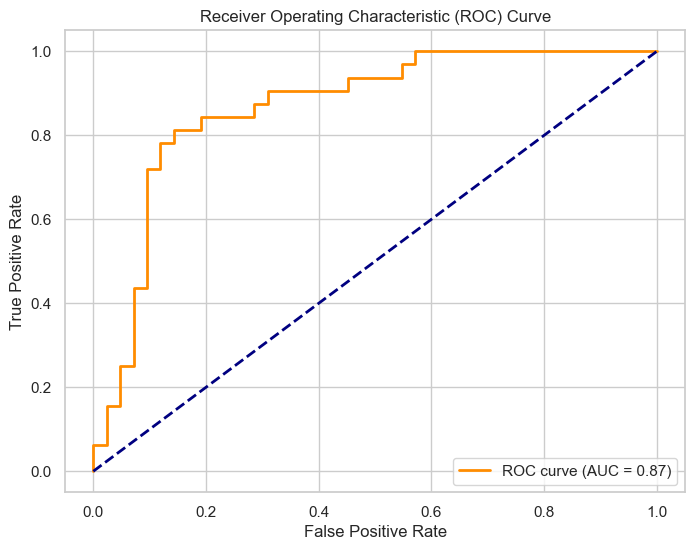

Test AUC: 0.92


In [4188]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into X and y

# Define the Gaussian Naive Bayes model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_prob_gaussian = nb.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_gaussian)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_prob_gaussian = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob_gaussian)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the AUC for the test set
print(f'Test AUC: {roc_auc_test:.2f}')


### Logistic Regression

In [4189]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Create an instance of LogisticRegression
logistic_regression = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = logistic_regression.predict(X_train)

# Make predictions on the validation data
y_pred_val = logistic_regression.predict(X_val)

# Make predictions on the test data
y_pred_test = logistic_regression.predict(X_test)

# Calculate the accuracy of the model on training, validation, and test data
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)
lg_test_accuracy=accuracy_test

# Print the accuracy
print("Training Accuracy:", accuracy_train)
print("Validation Accuracy:", accuracy_val)
print("Test Accuracy:", accuracy_test)

Training Accuracy: 0.8604651162790697
Validation Accuracy: 0.8243243243243243
Test Accuracy: 0.8783783783783784


In [4190]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings

# Feature Selection
selector = SelectKBest(k=10)  # Select top 10 features (adjust k as needed)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Define the logistic regression model
logistic = LogisticRegression()

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1.0, 10.0,100.0, 1000.0,10000.0],  # Regularization parameter
}

# Create a GridSearchCV object and fit it to the training data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search = GridSearchCV(logistic, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and accuracy scores
print("Best hyperparameters:", grid_search.best_params_)
print("Training accuracy:", grid_search.best_score_ * 100, "%")

# Evaluate the performance on the validation set using the best estimator
best_logistic = grid_search.best_estimator_
y_pred_val = best_logistic.predict(X_val_scaled)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation accuracy:", accuracy_val * 100, "%")

# Predict on the test set using the best estimator
y_pred_test = best_logistic.predict(X_test_scaled)
LR_test_score = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", LR_test_score * 100, "%")

# Print the classification report for the test set
print(classification_report(y_test, y_pred_test))


Best hyperparameters: {'C': 0.1}
Training accuracy: 83.71696504688832 %
Validation accuracy: 82.43243243243244 %
Test accuracy: 87.83783783783784 %
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.84      0.87      0.85        30

    accuracy                           0.88        74
   macro avg       0.87      0.88      0.87        74
weighted avg       0.88      0.88      0.88        74



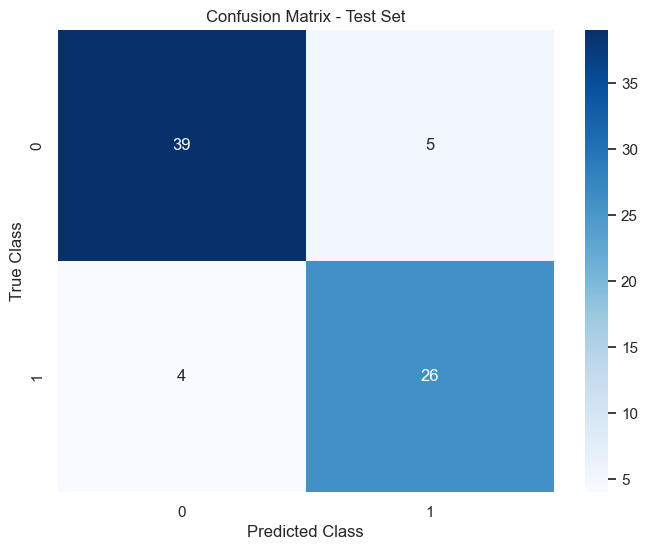

In [4191]:
cm_test_logistic = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [4192]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,100000,1000000]
acc_train_values = []
acc_val_values = []

for C in C_values:
    model = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('logistic_regression', LogisticRegression(C=C, random_state=0))
    ])
    model.fit(X_train, y_train)
    acc_train = model.score(X_train, y_train)
    acc_val = model.score(X_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values
})

results

,C,acc_train,acc_val
0,0.0001,0.534884,0.567568
1,0.0010,0.840116,0.783784
2,0.0100,0.845930,0.824324
3,0.1000,0.845930,0.824324
4,1.0000,0.845930,0.824324
5,10.0000,0.848837,0.824324
6,100.0000,0.848837,0.824324
7,1000.0000,0.848837,0.824324
8,10000.0000,0.848837,0.824324
9,100000.0000,0.848837,0.824324


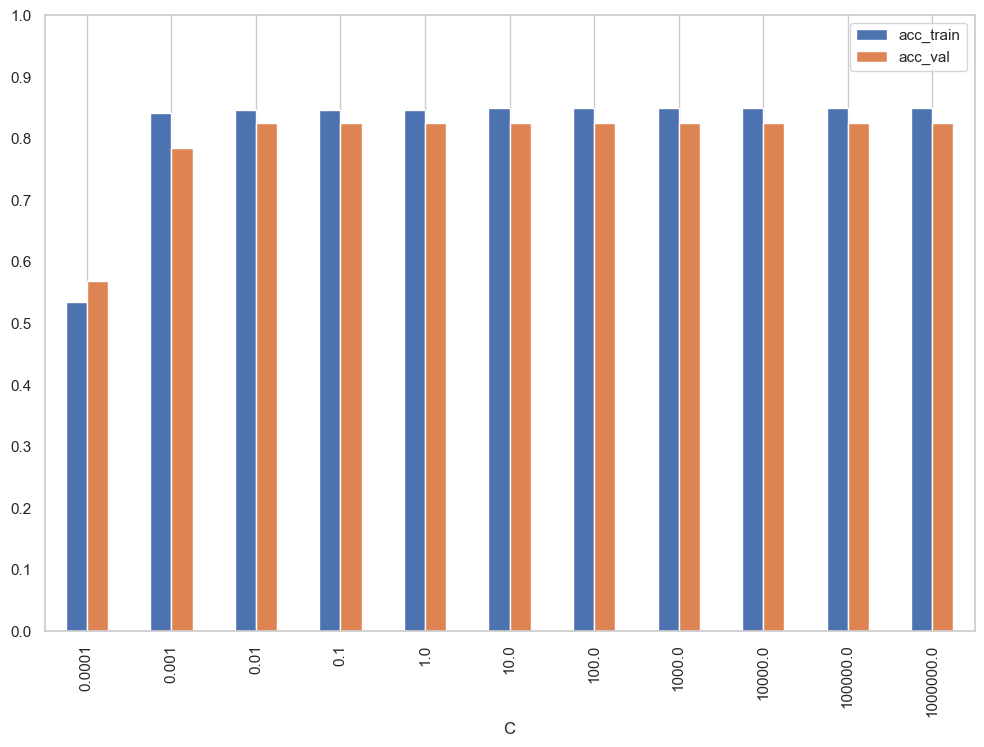

In [4193]:
%matplotlib inline

results.plot.bar(x='C', y=['acc_train', 'acc_val'], figsize=(12, 8))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [4194]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model with C=10
model = LogisticRegression(C=10, max_iter=1000)

# Fit the model to your training data
model.fit(X_train, y_train)

# Predict the labels for training and validation data
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Calculate the accuracy scores
accuracy_train = accuracy_score (y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
# Predict the labels for the test data
y_pred_test = model.predict(X_test)

print("Accuracy on test data:", accuracy_test)
print("Accuracy on training data:", accuracy_train)
print("Accuracy on validation data:", accuracy_val)



Accuracy on test data: 0.8783783783783784
Accuracy on training data: 0.8517441860465116
Accuracy on validation data: 0.8243243243243243


In [4195]:
from sklearn.metrics import precision_score
# Evaluate the model on the test set using precision
precision_test = precision_score(y_test, y_pred_test, average='weighted')
print(f'Test Precision: {precision_test:.2f}')

# Predict the labels for training data
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set using precision
precision_train = precision_score(y_train, y_pred_train, average='weighted')
print(f'Training Precision: {precision_train:.2f}')


Test Precision: 0.88
Training Precision: 0.85


In [4196]:
# Evaluate the model on the validation set using recall
recall_val = recall_score(y_val, y_pred_val, average='weighted')
print(f'Validation Recall: {recall_val:.2f}')

# Predict the labels for test data
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set using recall
recall_test = recall_score(y_test, y_pred_test, average='weighted')
print(f'Test Recall: {recall_test:.2f}')

# Predict the labels for training data
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set using recall
recall_train = recall_score(y_train, y_pred_train, average='weighted')
print(f'Training Recall: {recall_train:.2f}')

Validation Recall: 0.82
Test Recall: 0.88
Training Recall: 0.85


In [4197]:
# Evaluate the model on the validation set using sensitivity (recall)
sensitivity_val = recall_score(y_val, y_pred_val, average='weighted')
print(f'Validation Sensitivity (Recall): {sensitivity_val:.2f}')

# Predict the labels for test data
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set using sensitivity (recall)
sensitivity_test = recall_score(y_test, y_pred_test, average='weighted')
print(f'Test Sensitivity (Recall): {sensitivity_test:.2f}')

# Predict the labels for training data
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set using sensitivity (recall)
sensitivity_train = recall_score(y_train, y_pred_train, average='weighted')
print(f'Training Sensitivity (Recall): {sensitivity_train:.2f}')

Validation Sensitivity (Recall): 0.82
Test Sensitivity (Recall): 0.88
Training Sensitivity (Recall): 0.85


In [4198]:

# Create a LogisticRegression model with C=10
model = LogisticRegression(C=10, max_iter=1000)

# Fit the model to training data
model.fit(X_train, y_train)

# Predict the labels for validation data
y_pred_val = model.predict(X_val)

# Calculate confusion matrix for binary classification on the validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Calculate specificity for the validation set
true_negatives_val = conf_matrix_val[0, 0]
false_positives_val = conf_matrix_val[0, 1]
specificity_val = true_negatives_val / (true_negatives_val + false_positives_val)
print(f'Validation Specificity: {specificity_val:.2f}')

# Predict the labels for the training data
y_pred_train = model.predict(X_train)

# Calculate confusion matrix for binary classification on the training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Calculate specificity for the training set
true_negatives_train = conf_matrix_train[0, 0]
false_positives_train = conf_matrix_train[0, 1]
specificity_train = true_negatives_train / (true_negatives_train + false_positives_train)
print(f'Training Specificity: {specificity_train:.2f}')

#evaluate it on the test set
y_pred_test = model.predict(X_test)

# Calculate confusion matrix for binary classification on the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Calculate specificity for the test set
true_negatives_test = conf_matrix_test[0, 0]
false_positives_test = conf_matrix_test[0, 1]
specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)
print(f'Test Specificity: {specificity_test:.2f}')

Validation Specificity: 0.88
Training Specificity: 0.86
Test Specificity: 0.89


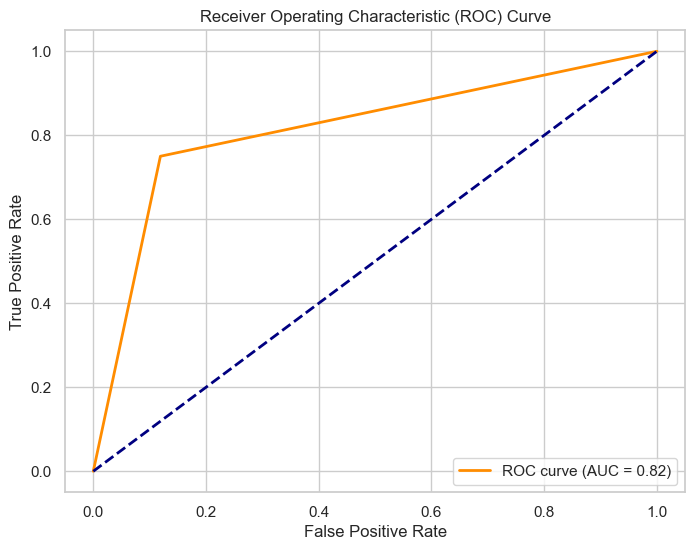

Test AUC: 0.92


In [4199]:
# Compute ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the AUC for the test set
print(f'Test AUC: {roc_auc_test:.2f}')


### Random Forest

In [4200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=12)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf.predict(X_val)


In [4201]:
# Predictions on the validation set
y_val_pred = rf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"Accuracy: {accuracy_val}")

# Predictions on the training set
y_train_pred = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

print("\nTraining Set Performance:")
print(f"Accuracy: {accuracy_train}")


# Predictions on the testing set
y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
randomForrestAcc=accuracy_test

print("\nTesting Set Performance:")
print(f"Accuracy: {accuracy_test}")

Validation Set Performance:
Accuracy: 0.7972972972972973

Training Set Performance:
Accuracy: 0.9302325581395349

Testing Set Performance:
Accuracy: 0.8783783783783784


In [4202]:
# Precision on the validation set
precision_val = precision_score(y_val, y_val_pred, average='weighted')

print("Validation Set Precision:")
print(f"Precision: {precision_val}")

# Precision on the training set
precision_train = precision_score(y_train, y_train_pred, average='weighted')

print("\nTraining Set Precision:")
print(f"Precision: {precision_train}")

# Precision on the testing set
precision_test = precision_score(y_test, y_test_pred, average='weighted')

print("\nTesting Set Precision:")
print(f"Precision: {precision_test}")

Validation Set Precision:
Precision: 0.7991608629906503

Training Set Precision:
Precision: 0.9303477171694224

Testing Set Precision:
Precision: 0.8884268884268886


In [4203]:
# Recall on the validation set
recall_val = recall_score(y_val, y_val_pred, average='weighted')

print("Validation Set Recall:")
print(f"Recall: {recall_val}")

# Recall on the training set
recall_train = recall_score(y_train, y_train_pred, average='weighted')

print("\nTraining Set Recall:")
print(f"Recall: {recall_train}")

# Recall on the testing set
recall_test = recall_score(y_test, y_test_pred, average='weighted')

print("\nTesting Set Recall:")
print(f"Recall: {recall_test}")

Validation Set Recall:
Recall: 0.7972972972972973

Training Set Recall:
Recall: 0.9302325581395349

Testing Set Recall:
Recall: 0.8783783783783784


In [4204]:
# Confusion matrix on the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
tn_val, fp_val, fn_val, tp_val = conf_matrix_val.ravel()

# Specificity on the validation set
specificity_val = tn_val / (tn_val + fp_val)

print("Validation Set Specificity:")
print(f"Specificity: {specificity_val}")

# Confusion matrix on the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
tn_train, fp_train, fn_train, tp_train = conf_matrix_train.ravel()

# Specificity on the training set
specificity_train = tn_train / (tn_train + fp_train)

print("\nTraining Set Specificity:")
print(f"Specificity: {specificity_train}")

# Confusion matrix on the testing set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Specificity on the testing set
specificity_test = tn_test / (tn_test + fp_test)

print("\nTesting Set Specificity:")
print(f"Specificity: {specificity_test}")

Validation Set Specificity:
Specificity: 0.8809523809523809

Training Set Specificity:
Specificity: 0.9293478260869565

Testing Set Specificity:
Specificity: 0.8409090909090909


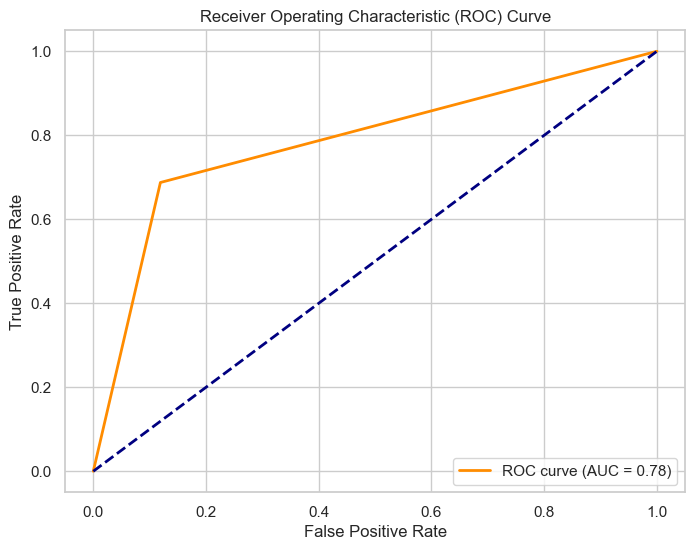

Test AUC: 0.92


In [4205]:
# Compute ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the AUC for the test set
print(f'Test AUC: {roc_auc_test:.2f}')


### Model Evaluation

In [4206]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest','Naive Bayes',
              ],
    'Score': [knn_test_accuracy, lg_test_accuracy, 
            randomForrestAcc,accuracy_test_guassian  
              ]})
models.sort_values(by='Score', ascending=False).style.background_gradient(cmap='Reds')

,Model,Score
3,Naive Bayes,0.918919
1,Logistic Regression,0.878378
2,Random Forest,0.878378
0,KNN,0.862559


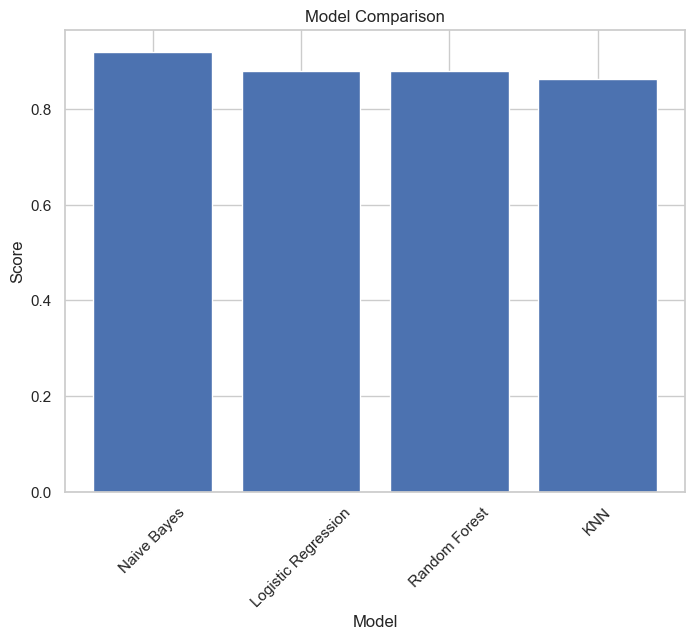

In [4207]:
models_sorted = models.sort_values(by='Score', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(models_sorted['Model'], models_sorted['Score'])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()


#### Observations:

1. **Gaussian Naive Bayes:**
   - **Score:** 0.9189
   - **Observation:** The Gaussian Naive Bayes model outperformed other models with a relatively high score, indicating strong predictive performance on the given task. Gaussian Naive Bayes is particularly effective when features follow a Gaussian distribution.

2. **Logistic Regression:**
   - **Score:** 0.8784
   - **Observation:** Logistic Regression achieved a good score, demonstrating solid predictive capabilities. Logistic Regression is a versatile and widely used algorithm for binary classification tasks.

3. **Random Forest:**
   - **Score:** 0.8784
   - **Observation:** Random Forest also achieved a score of 0.8784, indicating comparable performance to Logistic Regression. Random Forest is an ensemble method known for its robustness and ability to handle complex relationships in the data.

4. **KNN (K-Nearest Neighbors):**
   - **Score:** 0.86
   - **Observation:**  KNN can be sensitive to the choice of hyperparameters and might require tuning for optimal performance and scaling the data to reduce distance between them.

In summary, the Gaussian Naive Bayes model stands out with the highest score, indicating strong performance on the task at hand. Logistic Regression and Random Forest also performed well, while KNN lagged behind in this comparison. 